<h3>Eye blink data feature extraction method</h3>

In [1]:
def featureExtraction(fileDir, minCount, maxCount, leftLight):
    userHp1 = []
    userLp1 = []
    userLhpl1 = []
    userLlpl1 = []
    userHpl1 = []
    userLpl1 = []
    userLhpg1 = []
    userLlpg1 = []
    userRhpg1 = []
    userRlpg1 = []
    userBlink1 = []
    userNotBlink1 = []
    
    for count in range(minCount, maxCount):
        file = open(fileDir + '/file' + str(count) + '-' + str(leftLight) + '.txt', 'r')
        x = file.read()
        file.close()
    
        x = x.split(',')
    
        data1 = []
    
        for index, item in enumerate(x):
            data1.append(float(item))
        
        for index, item in enumerate(x):
            if(index != len(data1) -1):
                data1[index] = data1[index + 1]
            
        temp = 0
        index = 0

        start1 = []
        middle1 = []
        finish1 = []

        for i in range(0, len(data1)):
            if((temp + 150 < i) and (data1[i] > 100)):
                for j in range(i, 0, -1):
                    if(data1[j] <= 0):
                        start1.append(j)
                        break
                
                for j in range(start1[index] + 1, len(data1)):
                    if(data1[j] <= 0):
                        middle1.append(j)
                        break
                
                for j in range(middle1[index] + 1, len(data1)):
                    if(data1[j] >= 0):
                        finish1.append(j)
                        break
                
                i = finish1[index]
                index = index + 1
                temp = i
   
        temp = 0
    
        hp1 = []
        lp1 = []
        lhpl1 = []
        llpl1 = []
        hpl1 = []
        lpl1 = []
        lhpg1 = []
        llpg1 = []
        rhpg1 = []
        rlpg1 = []
        blink1 = []
        notBlink1 = []
    
        index = 0;
    
        for i in range(start1[0], finish1[len(finish1) - 1]):
            hp1.append(0)
            lp1.append(0)
            lhpl1.append(0)
            llpl1.append(0)
            hpl1.append(0)
            lpl1.append(0)
            lhpg1.append(0)
            llpg1.append(0)
            rhpg1.append(0)
            rlpg1.append(0)
            blink1.append(0)
            notBlink1.append(0)
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] < data1[j]):
                    hp1[index] = data1[j]
                    lhpl1[index] = j - start1[index]
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] > data1[j]):
                    lp1[index] = data1[j]
                    llpl1[index] = j - start1[index]
            
            hpl1[index] = middle1[index] - start1[index]
            lpl1[index] = finish1[index] - middle1[index]
    
            lhpg1[index] = hp1[index] / lhpl1[index]
            llpg1[index] = lp1[index] / llpl1[index]
            rhpg1[index] = hp1[index] / (hpl1[index] - lhpg1[index])
            rlpg1[index] = lp1[index] / (lpl1[index] - llpl1[index])
    
            index = index + 1
    
            if(len(start1) == index):
                break
    
            i = start1[index]
        
        index = 0;
        
        for i in range(0, len(finish1)):
            blink1[i] = finish1[i] - start1[i]

        for i in range(0, len(finish1) - 1):
            notBlink1[i] = start1[i + 1] - finish1[i]
        
        for i in range(0, len(finish1)):
            userHp1.append(hp1[i])
            userLp1.append(lp1[i])
            userLhpl1.append(lhpl1[i])
            userLlpl1.append(llpl1[i])
            userHpl1.append(hpl1[i])
            userLpl1.append(lpl1[i])
            userLhpg1.append(lhpg1[i])
            userLlpg1.append(llpg1[i])
            userRhpg1.append(rhpg1[i])
            userRlpg1.append(rlpg1[i])
            userBlink1.append(blink1[i])
            userNotBlink1.append(notBlink1[i])
            
    return userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1

<hr>
<h3>user1 data extraction</h3>

In [2]:
user1Data  = []
user1Label = []

In [3]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user1', 0, 49, 1)

In [4]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user1', 0, 49, 2)

In [5]:
sum = len(userHp1) +len(userHp2)

In [6]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [7]:
for i in range(0, sum):
    user1Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user1Label.append(0)

<hr>
<h3>user2 data extraction</h3>

In [8]:
user2Data  = []
user2Label = []

In [9]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user2', 0, 49, 1)

In [10]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user2', 0, 49, 2)

In [11]:
sum = len(userHp1) +len(userHp2)

In [12]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [13]:
for i in range(0, sum):
    user2Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user2Label.append(1)

<hr>
<h3>Artifact data extraction</h3>

In [14]:
user3Data  = []
user3Label = []

In [15]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 1)

In [16]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 2)

In [17]:
sum = len(userHp1) +len(userHp2)

In [18]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [19]:
for i in range(0, sum):
    user3Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user3Label.append(2)

<hr>
<h3>Eye blink data preprocessing</h3>

In [20]:
import numpy as np

In [21]:
user1Data = np.array(user1Data)
user2Data = np.array(user2Data)
user3Data = np.array(user3Data)

user1Label = np.array(user1Label)
user2Label = np.array(user2Label)
user3Label = np.array(user3Label)

In [22]:
print('Number of user1 data', len(user1Data))

Number of user1 data 841


In [23]:
print('Number of user2 data', len(user2Data))

Number of user2 data 1516


In [24]:
print('Number of artifact data', len(user3Data))

Number of artifact data 882


<hr>
<h3>Data sum</h3>

In [25]:
data = np.concatenate((user1Data, user2Data, user3Data), axis=0)

In [26]:
len(data)

3239

In [27]:
label = np.concatenate((user1Label, user2Label, user3Label), axis=0)

In [28]:
len(label)

3239

<hr>
<h3>Data mixing</h3>

In [29]:
s = np.arange(data.shape[0])
np.random.shuffle(s)

In [30]:
data = data[s]
label = label[s]

In [31]:
label

array([2, 2, 1, ..., 0, 1, 1])

<hr>
<h3>Data sharing & create labels</h3>

In [32]:
tempLabel = []
testLabel = label[2600:]

In [33]:
for i in range(0, len(label)):
    if(label[i] == 0):
        tempLabel.append([1, 0, 0])
    elif(label[i] == 1):
        tempLabel.append([0, 1, 0])
    else:
        tempLabel.append([0, 0, 1])

In [34]:
label = tempLabel

In [35]:
label = np.array(label)

In [36]:
train_data = data[:2000]
val_data = data[2000:2600]
test_data = data[2600:]

train_label = label[:2000]
val_label = label[2000:2600]
test_label = label[2600:]

<hr>
<h3>Data regularization</h3>

In [37]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

<hr>
<h3>import modules</h3>

In [38]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt

<hr>
<h3>Make model function</h3>

In [40]:
def build_model(actiFunc, lossFunc, hidden, node, dropout):
    model = models.Sequential()
    
    model.add(layers.Dense(node[0], activation=actiFunc, input_shape=(12, )))
    model.add(layers.Dropout(dropout))
    
    if(hidden == 2):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    if(hidden == 3):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        
    if(hidden == 4):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[3], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='rmsprop', loss=lossFunc, metrics=['accuracy'])
    return model

<hr>
<h3>result</h3>

Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 4 ]  BatchSize: 512   Dropout: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
________________________

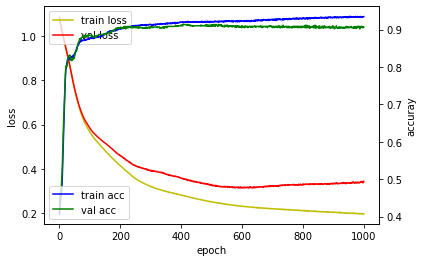

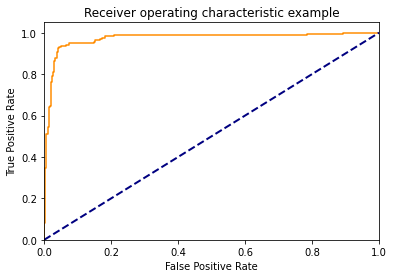


fpr : [0.         0.         0.         0.         0.         0.00214592
 0.00214592 0.00429185 0.00429185 0.00643777 0.01072961 0.01072961
 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738 0.01716738
 0.0193133  0.0193133  0.02145923 0.02145923 0.02360515 0.02360515
 0.02575107 0.02575107 0.027897   0.027897   0.03004292 0.03004292
 0.03218884 0.03218884 0.03862661 0.03862661 0.04077253 0.04077253
 0.04506438 0.04506438 0.04935622 0.04935622 0.06652361 0.06652361
 0.07296137 0.07296137 0.14806867 0.14806867 0.15236052 0.15236052
 0.16523605 0.16523605 0.17381974 0.17381974 0.18240343 0.18240343
 0.20815451 0.20815451 0.2832618  0.75536481 0.78540773 0.78540773
 0.84978541 0.85407725 0.86480687 0.86909871 0.87553648 0.87982833
 0.88197425 0.88626609 0.89270386 0.89270386 0.91201717 0.92060086
 0.92703863 0.93133047 0.93562232 0.94206009 0.94635193 0.9527897
 0.95708155 0.96566524 0.96995708 0.97639485 0.9806867  0.99356223
 0.99785408 1.        ]

tpr : [0.         0.04046243 0.

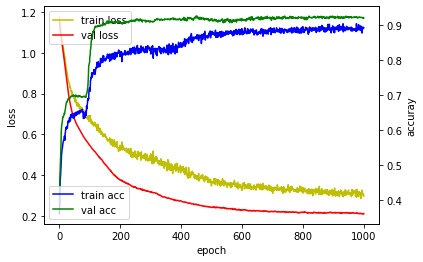

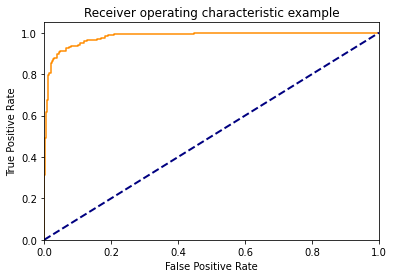


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00858369 0.00858369 0.01072961 0.01072961 0.01502146
 0.01502146 0.0193133  0.0193133  0.02145923 0.02145923 0.02360515
 0.02360515 0.02575107 0.02575107 0.027897   0.027897   0.03862661
 0.03862661 0.04506438 0.04506438 0.0472103  0.0472103  0.06437768
 0.06437768 0.0751073  0.0751073  0.07939914 0.07939914 0.10085837
 0.10085837 0.10729614 0.10729614 0.12017167 0.12017167 0.12660944
 0.12660944 0.15665236 0.15665236 0.1695279  0.1695279  0.18240343
 0.18240343 0.19098712 0.19098712 0.20815451 0.20815451 0.39914163
 0.40343348 0.42060086 0.4248927  0.42703863 0.43562232 0.44635193
 0.44635193 0.68454936 0.6888412  0.74892704 0.75321888 0.89914163
 0.90343348 0.9055794  0.90987124 0.9248927  0.92918455 0.96351931
 0.96781116 1.        ]

tpr : [0.         0.01156069 0.31213873 0.31213873 0.49132948 0.49132948
 0.61849711 0.61849711 0.67630058 0.67630058 0.79768786 0.79768786
 0.80346821 0.80346821 0

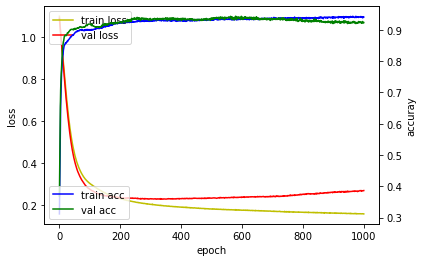

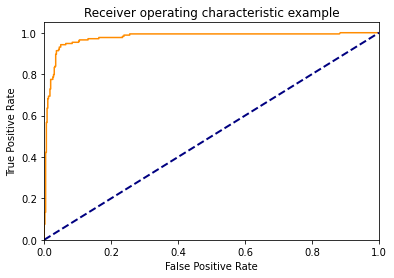


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02575107 0.02575107 0.027897   0.027897
 0.03004292 0.03004292 0.03218884 0.03218884 0.03433476 0.03433476
 0.03648069 0.03648069 0.04291845 0.04291845 0.04506438 0.04506438
 0.04935622 0.04935622 0.06437768 0.06437768 0.08369099 0.08369099
 0.10300429 0.10300429 0.10515021 0.10515021 0.13090129 0.13090129
 0.16309013 0.16309013 0.22746781 0.23175966 0.23390558 0.23390558
 0.23819742 0.23819742 0.25536481 0.25536481 0.55150215 0.55579399
 0.58583691 0.59012876 0.59656652 0.60085837 0.63519313 0.63948498
 0.72317597 0.72746781 0.72961373 0.73390558 0.75107296 0.75536481
 0.76824034 0.77253219 0.78540773 0.78969957 0.81545064 0.81974249
 0.85407725 0.86051502 0.88197425 0.88412017 0.89270386 0.89699571
 0.90772532 0.91201717 0.91416309 0.92060086 0.92918455 0.

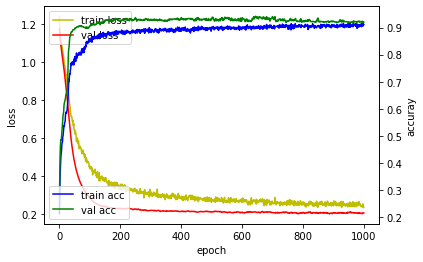

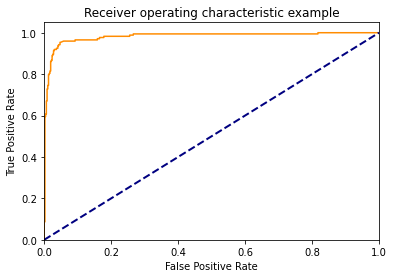


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.02360515
 0.02360515 0.02575107 0.02575107 0.027897   0.027897   0.03004292
 0.03004292 0.03648069 0.03648069 0.04077253 0.04077253 0.04291845
 0.04291845 0.0472103  0.0472103  0.04935622 0.05793991 0.09227468
 0.09227468 0.15879828 0.15879828 0.16523605 0.16523605 0.17811159
 0.17811159 0.25536481 0.25536481 0.26609442 0.26609442 0.42703863
 0.43133047 0.48283262 0.48712446 0.51716738 0.52145923 0.53648069
 0.54077253 0.57296137 0.57725322 0.65879828 0.66309013 0.73175966
 0.7360515  0.74678112 0.75107296 0.79184549 0.79613734 0.81759657
 0.81759657 0.82618026 0.8304721  0.85193133 0.85622318 0.86909871
 0.87339056 0.87553648 0.88197425 0.88626609 0.89484979 0.89914163
 0.9055794  0.91630901 0.92060086 0.9248927  0.93133047

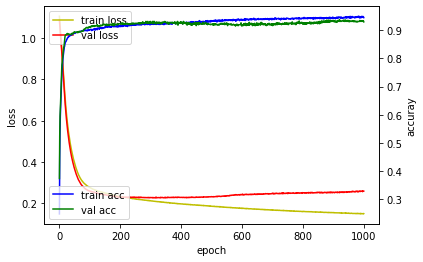

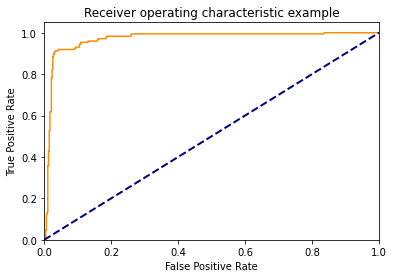


fpr : [0.         0.         0.00429185 0.00429185 0.00643777 0.00643777
 0.00858369 0.00858369 0.01072961 0.01072961 0.01287554 0.01287554
 0.01502146 0.01502146 0.01716738 0.01716738 0.02145923 0.02145923
 0.02360515 0.02360515 0.02575107 0.02575107 0.027897   0.027897
 0.03004292 0.03004292 0.03433476 0.03433476 0.04291845 0.04291845
 0.09012876 0.09012876 0.0944206  0.0944206  0.10515021 0.10515021
 0.10729614 0.10729614 0.10944206 0.10944206 0.13090129 0.13090129
 0.13948498 0.14377682 0.15879828 0.15879828 0.16094421 0.16094421
 0.18454936 0.18454936 0.18669528 0.18669528 0.25965665 0.25965665
 0.43562232 0.43991416 0.5193133  0.52360515 0.61158798 0.61587983
 0.65879828 0.66309013 0.66738197 0.67167382 0.71030043 0.71459227
 0.72961373 0.73390558 0.79399142 0.79828326 0.82618026 0.83261803
 0.83476395 0.83690987 0.84120172 0.84334764 0.85622318 0.86266094
 0.87124464 0.89270386 1.        ]

tpr : [0.         0.00578035 0.00578035 0.04624277 0.04624277 0.12138728
 0.12138728 0.1

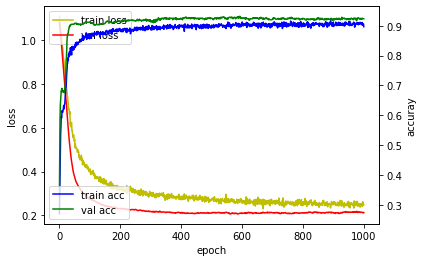

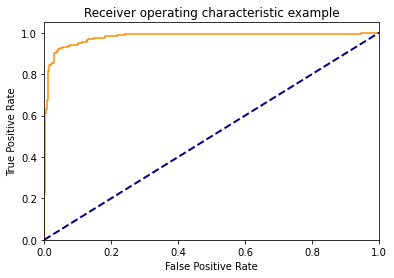


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00643777
 0.00643777 0.00858369 0.00858369 0.01072961 0.01072961 0.01287554
 0.01287554 0.01502146 0.01502146 0.0193133  0.0193133  0.02360515
 0.02360515 0.027897   0.027897   0.03004292 0.03004292 0.03433476
 0.03433476 0.03862661 0.03862661 0.04077253 0.04077253 0.0472103
 0.0472103  0.05579399 0.05579399 0.07081545 0.07081545 0.07725322
 0.07725322 0.10085837 0.10085837 0.11158798 0.11158798 0.12875536
 0.12875536 0.13090129 0.13090129 0.15021459 0.15021459 0.18240343
 0.18240343 0.2167382  0.2167382  0.24034335 0.24034335 0.41416309
 0.41845494 0.49570815 0.5        0.64592275 0.65021459 0.71030043
 0.71459227 0.74034335 0.74463519 0.74678112 0.75107296 0.83905579
 0.84763948 0.92274678 0.92703863 0.94635193 0.94635193 0.97424893
 0.97854077 0.99356223 0.99785408 1.        ]

tpr : [0.         0.00578035 0.21965318 0.21965318 0.61271676 0.61271676
 0.6300578  0.6300578  0.67630058 0.67630058 0.8150289  0.8150289
 0.8

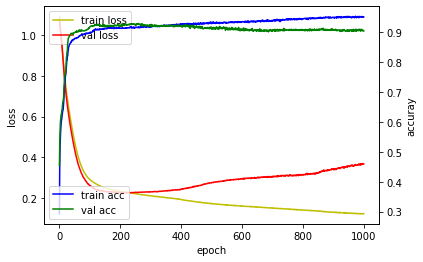

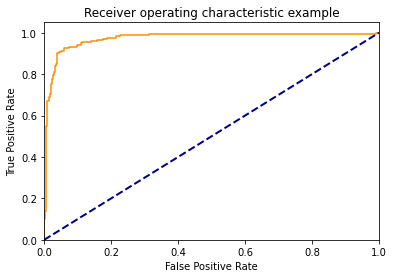


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01287554
 0.01287554 0.01502146 0.01502146 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03218884 0.03218884 0.03648069
 0.03648069 0.03862661 0.03862661 0.04506438 0.04506438 0.04935622
 0.05150215 0.05150215 0.05793991 0.05793991 0.07296137 0.07296137
 0.09656652 0.09656652 0.09871245 0.09871245 0.10944206 0.10944206
 0.11158798 0.11158798 0.13948498 0.13948498 0.15665236 0.15665236
 0.17596567 0.17596567 0.18669528 0.18669528 0.21459227 0.21459227
 0.22746781 0.22746781 0.31330472 0.31330472 0.40343348 0.40772532
 0.46995708 0.47424893 0.50214592 0.50643777 0.61373391 0.61802575
 0.67381974 0.67811159 0.74034335 0.74463519 0.79828326 0.80257511
 0.83905579 0.84334764 0.86051502 0.86909871 0.89699571 0.90128755
 0.9055794  0.90987124 0.9248927  0.93133047 0.94635193 

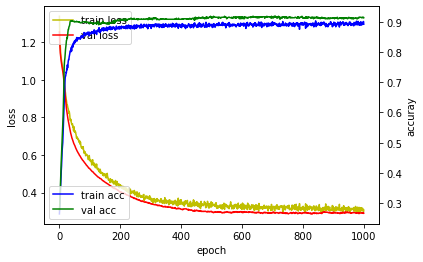

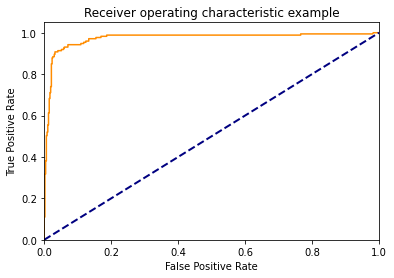


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.02360515
 0.02360515 0.02575107 0.02575107 0.03004292 0.03004292 0.03218884
 0.03218884 0.04077253 0.04077253 0.05150215 0.05150215 0.05793991
 0.05793991 0.06008584 0.06008584 0.07081545 0.07081545 0.10944206
 0.10944206 0.11802575 0.11802575 0.1223176  0.12446352 0.12446352
 0.13304721 0.13304721 0.15450644 0.15450644 0.1695279  0.1695279
 0.18669528 0.18669528 0.25751073 0.26180258 0.29399142 0.75321888
 0.76609442 0.76609442 0.80472103 0.80901288 0.82188841 0.82618026
 0.84978541 0.85407725 0.8583691  0.86266094 0.86909871 0.87339056
 0.8776824  0.88626609 0.89270386 0.89699571 0.90128755 0.9055794
 0.90772532 0.91201717 0.92703863 0.94849785 0.9527897  0.95708155
 0.95922747 0.96781116 0.97424893 0.97639485 0.9806867  0

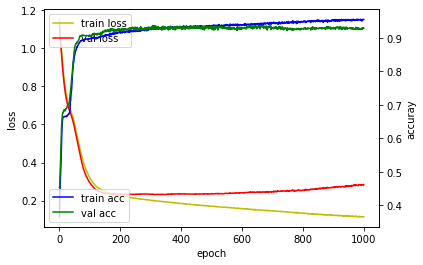

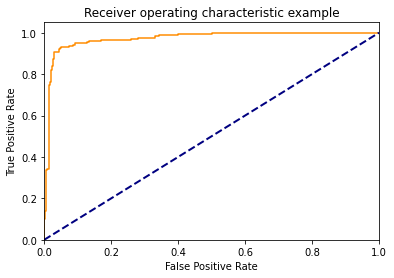


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01287554
 0.01287554 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923
 0.02145923 0.02360515 0.02360515 0.02575107 0.02575107 0.027897
 0.027897   0.04506438 0.04506438 0.0472103  0.0472103  0.04935622
 0.04935622 0.07296137 0.07296137 0.08583691 0.08583691 0.09227468
 0.09227468 0.12660944 0.12660944 0.13519313 0.13519313 0.1695279
 0.1695279  0.25965665 0.25965665 0.28111588 0.28111588 0.3304721
 0.3304721  0.33476395 0.33905579 0.34334764 0.34334764 0.38197425
 0.38626609 0.39270386 0.39699571 0.39914163 0.39914163 0.4806867
 0.48497854 0.48712446 0.49141631 0.50214592 0.50214592 0.54935622
 0.55364807 0.73175966 0.7360515  0.83690987 0.84549356 0.85622318
 0.86051502 0.87553648 0.88412017 0.88841202 0.89914163 0.90128755
 0.90772532 0.91201717 0.91630901 0.92274678 0.94420601 0.96995708
 0.9806867  0.98927039 0.99570815 1.        ]

tpr : [0.    

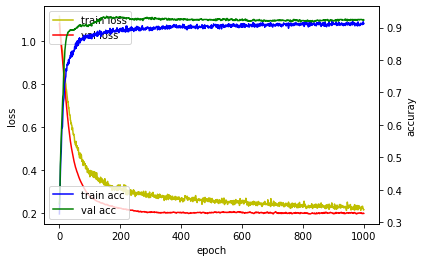

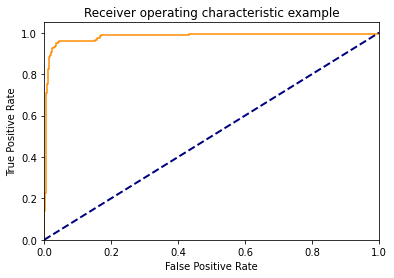


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.02145923 0.02145923 0.02360515 0.02360515 0.03004292
 0.03004292 0.03218884 0.03218884 0.03433476 0.03433476 0.03648069
 0.03648069 0.04077253 0.04077253 0.04506438 0.04506438 0.15236052
 0.15236052 0.15665236 0.15665236 0.16523605 0.16523605 0.1695279
 0.1695279  0.43347639 0.43347639 0.44635193 0.45064378 0.53218884
 0.53648069 0.5472103  0.55150215 0.56437768 0.56866953 0.60515021
 0.60944206 0.63090129 0.63519313 0.64592275 0.65021459 0.84549356
 0.85193133 0.86266094 0.86909871 0.88197425 0.89055794 0.90128755
 0.90343348 0.90772532 0.90987124 0.91630901 0.92060086 0.92274678
 0.92703863 0.92918455 0.93347639 0.93991416 0.94420601 0.95064378
 0.9527897  0.95922747 0.96137339 0.96566524 0.972103   0.97639485
 0.98927039 0.99356223 0.99785408 0.99785408 1.        ]

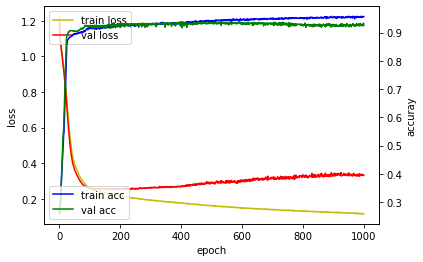

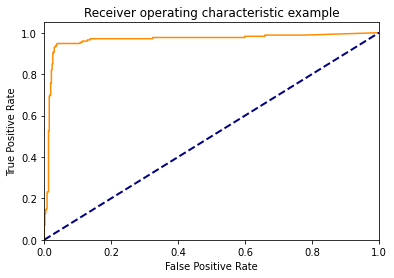


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00214592
 0.00214592 0.00429185 0.00429185 0.00643777 0.00643777 0.00858369
 0.00858369 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.02360515
 0.02360515 0.02575107 0.02575107 0.027897   0.027897   0.03004292
 0.03004292 0.03433476 0.03433476 0.03648069 0.03648069 0.03862661
 0.03862661 0.10729614 0.10729614 0.11373391 0.11373391 0.12875536
 0.12875536 0.13733906 0.13733906 0.17167382 0.17596567 0.32403433
 0.32403433 0.41845494 0.42274678 0.50429185 0.50858369 0.56866953
 0.57296137 0.58369099 0.58798283 0.5944206  0.59871245 0.59871245
 0.61587983 0.62017167 0.65879828 0.65879828 0.67381974 0.67811159
 0.69957082 0.70386266 0.71888412 0.72317597 0.74678112 0.75107296
 0.75321888 0.77467811 1.        ]

tpr : [0.         0.05202312 0.06936416 0.06936416 0.0867052  0.0982659
 0.12716763 0.12716763 0.14450867 0.14450867 0.15028902 0.15028902
 0.23121387 0.

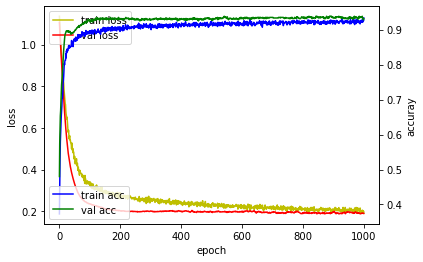

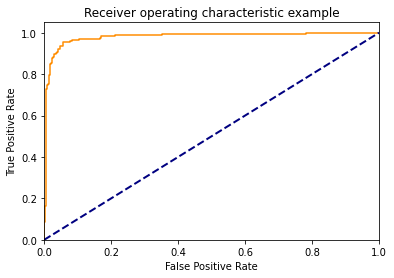


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01716738 0.01716738 0.0193133
 0.0193133  0.02360515 0.02360515 0.02575107 0.02575107 0.027897
 0.027897   0.03004292 0.03004292 0.03433476 0.03433476 0.03862661
 0.03862661 0.04077253 0.04077253 0.0472103  0.0472103  0.05579399
 0.05579399 0.07725322 0.07725322 0.08369099 0.08369099 0.10515021
 0.10515021 0.16523605 0.16523605 0.1695279  0.1695279  0.21030043
 0.21030043 0.28540773 0.28969957 0.35193133 0.35193133 0.45708155
 0.46137339 0.57081545 0.5751073  0.58154506 0.58583691 0.63948498
 0.64377682 0.64592275 0.65021459 0.66094421 0.66523605 0.68025751
 0.68454936 0.78111588 0.78111588 0.78540773 0.80257511 0.80686695
 0.86480687 0.86909871 0.87982833 0.88841202 0.89055794 0.89484979
 0.89699571 0.90343348 0.9055794  0.90987124 0.91201717 0.91630901
 0.92060086 0.92918455 0.93133047 0.94420601 0.95064378 0.

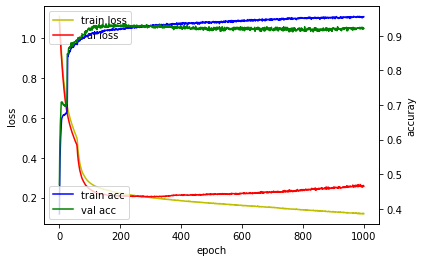

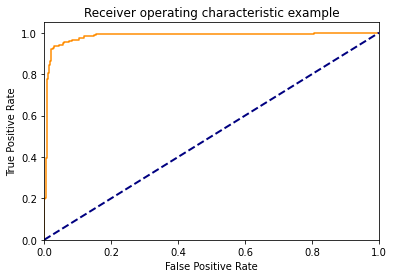


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02575107 0.02575107 0.027897
 0.027897   0.03004292 0.03004292 0.04291845 0.04291845 0.05579399
 0.05579399 0.06008584 0.06008584 0.07296137 0.07296137 0.08154506
 0.08154506 0.09012876 0.0944206  0.10515021 0.10515021 0.11802575
 0.11802575 0.15021459 0.15021459 0.15450644 0.15450644 0.35407725
 0.3583691  0.36051502 0.36480687 0.3776824  0.38197425 0.44849785
 0.4527897  0.63733906 0.6416309  0.68025751 0.68454936 0.80686695
 0.80686695 0.85622318 0.86051502 0.86266094 0.86695279 0.86909871
 0.87339056 0.90343348 0.91630901 0.9248927  0.92703863 0.93347639
 0.94206009 0.94849785 0.96351931 0.9806867  0.99570815 1.        ]

tpr : [0.         0.01156069 0.19653179 0.19653179 0.20231214 0.20231214
 0.25433526 0.25433526 0.39306358 0.39306358 0.774

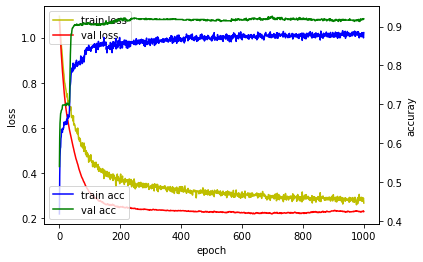

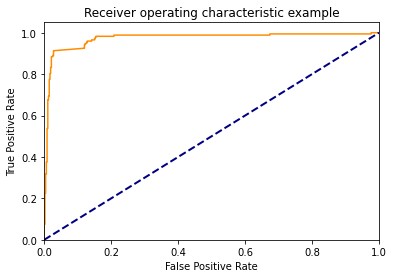


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.02575107
 0.02575107 0.027897   0.027897   0.03004292 0.11802575 0.12017167
 0.12017167 0.1223176  0.1223176  0.12660944 0.12660944 0.12875536
 0.12875536 0.13519313 0.13948498 0.1416309  0.1416309  0.15021459
 0.15021459 0.15236052 0.15236052 0.15450644 0.15450644 0.20815451
 0.20815451 0.45493562 0.46137339 0.47424893 0.47854077 0.5472103
 0.55150215 0.57939914 0.58369099 0.65665236 0.66094421 0.67381974
 0.67381974 0.70600858 0.71030043 0.7167382  0.72103004 0.72746781
 0.73175966 0.87982833 0.88412017 0.9527897  0.95708155 0.97639485
 0.97639485 1.        ]

tpr : [0.         0.01156069 0.07514451 0.07514451 0.22543353 0.22543353
 0.31791908 0.31791908 0.37572254 0.37572254 0.53757225 0.53757225
 0.67630058 0.67630058 0.

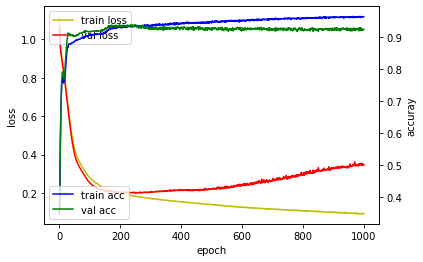

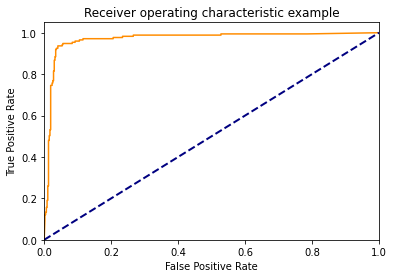


fpr : [0.         0.00214592 0.00214592 0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03004292 0.03004292 0.03218884
 0.03218884 0.03433476 0.03433476 0.03648069 0.03648069 0.04077253
 0.04077253 0.05364807 0.05364807 0.05579399 0.05579399 0.08369099
 0.08369099 0.09227468 0.09227468 0.10515021 0.10515021 0.11587983
 0.11587983 0.20600858 0.20600858 0.23390558 0.23390558 0.26609442
 0.26609442 0.49785408 0.50214592 0.527897   0.527897   0.59012876
 0.59656652 0.60729614 0.61587983 0.66309013 0.66738197 0.68025751
 0.68454936 0.71244635 0.7167382  0.72103004 0.72532189 0.73175966
 0.7360515  0.77896996 0.78540773 1.        ]

tpr : [0.         0.0982659  0.10404624 0.11560694 0.12138728 0.12138728
 0.13294798 0.13294798 0.15606936 0.15606936 0.19075145 0.19075145
 0

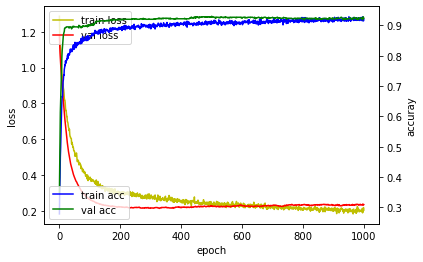

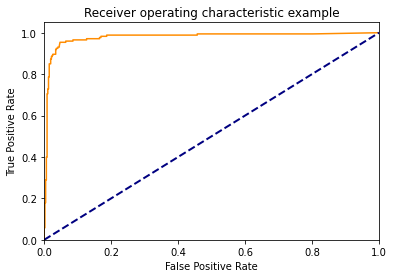


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.02575107
 0.02575107 0.03433476 0.03433476 0.03648069 0.03648069 0.04077253
 0.04077253 0.04506438 0.04506438 0.0472103  0.06437768 0.06437768
 0.08583691 0.08583691 0.12660944 0.12660944 0.16523605 0.16523605
 0.1695279  0.1695279  0.18669528 0.18669528 0.45708155 0.45708155
 0.49356223 0.49785408 0.5944206  0.59871245 0.62017167 0.62446352
 0.65021459 0.65450644 0.65879828 0.66309013 0.71888412 0.72317597
 0.78969957 0.80257511 1.        ]

tpr : [0.         0.03468208 0.05780347 0.05780347 0.17919075 0.17919075
 0.28901734 0.28901734 0.39884393 0.39884393 0.70520231 0.70520231
 0.7283237  0.7283237  0.78612717 0.78612717 0.84971098 0.84971098
 0.87283237 0.87283237 0.88439306 0.88439306 0.89017341 0.89017341
 0.89595376 0.

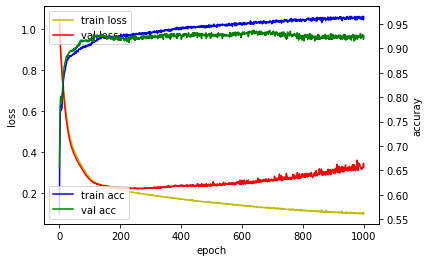

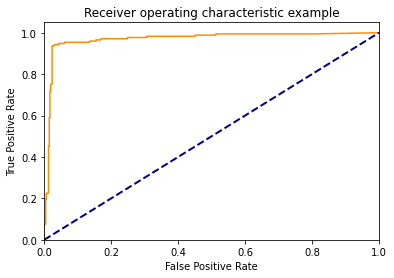


fpr : [0.         0.         0.         0.00429185 0.00429185 0.00643777
 0.00643777 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02360515 0.02360515 0.03004292
 0.03004292 0.03433476 0.04291845 0.04291845 0.06008584 0.06008584
 0.13519313 0.13519313 0.15450644 0.15450644 0.1695279  0.1695279
 0.24892704 0.24892704 0.30686695 0.30686695 0.43347639 0.43776824
 0.45064378 0.45064378 0.49785408 0.50214592 0.51287554 0.51287554
 0.57725322 0.58583691 0.59656652 0.60085837 0.60300429 0.60729614
 0.63519313 0.63948498 0.65879828 0.66309013 0.68240343 0.68669528
 0.69957082 0.70815451 0.7167382  0.72961373 0.73390558 0.74248927
 0.74892704 0.75751073 0.75965665 0.76609442 0.78755365 0.80472103
 1.        ]

tpr : [0.         0.06936416 0.07514451 0.07514451 0.19653179 0.19653179
 0.22543353 0.22543353 0.45086705 0.45086705 0.58959538 0.58959538
 0.71676301 0.71676301 0.75144509 0.75144509 0.93641618 0.93641618
 0.94219653 0.94219653 0.94219653 0.

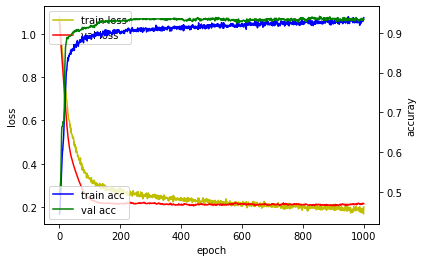

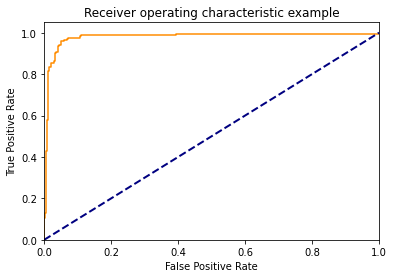


fpr : [0.         0.         0.         0.         0.00214592 0.00214592
 0.00429185 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369
 0.01072961 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146
 0.0193133  0.0193133  0.03004292 0.03004292 0.03218884 0.03218884
 0.03648069 0.03648069 0.04077253 0.04077253 0.04506438 0.04506438
 0.04935622 0.04935622 0.05150215 0.05150215 0.06008584 0.06008584
 0.06866953 0.06866953 0.07081545 0.07081545 0.10729614 0.10729614
 0.10944206 0.10944206 0.3111588  0.31545064 0.39484979 0.39484979
 0.44849785 0.4527897  0.58583691 0.59012876 0.59227468 0.59656652
 0.60300429 0.60729614 0.63304721 0.63733906 0.66094421 0.66523605
 0.72961373 0.73390558 0.79613734 0.80042918 0.80257511 0.8111588
 0.81330472 0.81759657 0.82832618 0.83261803 0.84334764 0.84763948
 0.86909871 0.87339056 0.92274678 0.92703863 0.94420601 0.94849785
 0.95493562 0.95922747 0.96137339 0.96566524 1.         1.        ]

tpr : [0.         0.02312139 0.03468208 0.10404624 0.1

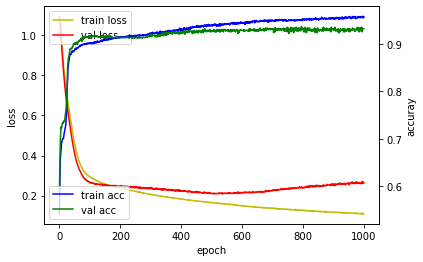

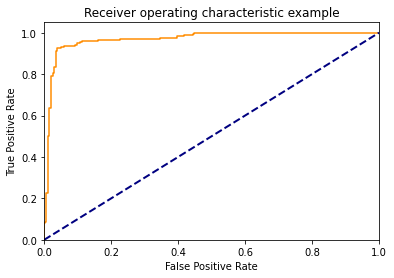


fpr : [0.         0.         0.         0.         0.00214592 0.00214592
 0.00429185 0.00429185 0.00643777 0.00643777 0.01072961 0.01072961
 0.01287554 0.01287554 0.01502146 0.01502146 0.0193133  0.0193133
 0.02145923 0.02145923 0.02575107 0.02575107 0.027897   0.027897
 0.03004292 0.03004292 0.03433476 0.03433476 0.03648069 0.03648069
 0.03862661 0.03862661 0.04935622 0.04935622 0.06008584 0.06008584
 0.09227468 0.09227468 0.09871245 0.09871245 0.10729614 0.10729614
 0.11158798 0.11158798 0.11373391 0.13733906 0.16094421 0.16094421
 0.22532189 0.22532189 0.34120172 0.34549356 0.34549356 0.39055794
 0.39484979 0.39699571 0.39699571 0.41845494 0.41845494 0.44420601
 0.44420601 0.44635193 0.44635193 0.45922747 0.46351931 0.56223176
 0.56652361 0.60944206 0.61802575 0.63090129 0.63519313 0.63733906
 0.6416309  0.64377682 0.64806867 0.65450644 0.66738197 0.67381974
 0.67596567 0.68240343 0.69098712 0.69527897 0.69957082 0.70386266
 0.70600858 0.71244635 0.72103004 0.72317597 0.72746781 0.

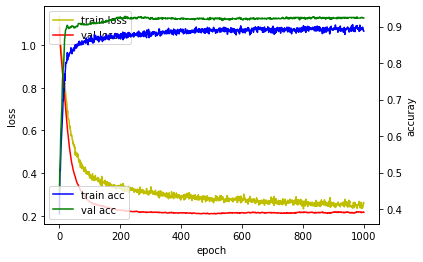

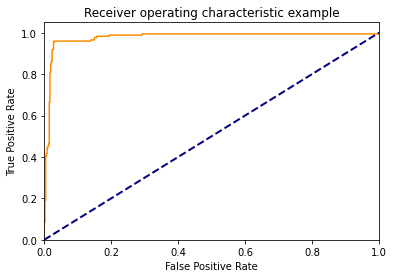


fpr : [0.         0.         0.         0.         0.         0.00214592
 0.00214592 0.00429185 0.00429185 0.00643777 0.00643777 0.00858369
 0.00858369 0.01072961 0.01072961 0.01287554 0.01287554 0.01502146
 0.01502146 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923
 0.02145923 0.02360515 0.02360515 0.027897   0.027897   0.03004292
 0.03004292 0.05150215 0.13948498 0.13948498 0.14592275 0.15021459
 0.15021459 0.15665236 0.15665236 0.19313305 0.19313305 0.29184549
 0.29184549 0.31330472 0.31759657 0.45708155 0.46137339 0.48283262
 0.48712446 0.55150215 0.55579399 0.5944206  0.59871245 0.64806867
 0.65236052 0.71030043 0.71459227 1.         1.        ]

tpr : [0.         0.05202312 0.05780347 0.06936416 0.08092486 0.0867052
 0.19075145 0.19075145 0.40462428 0.40462428 0.41618497 0.41618497
 0.44508671 0.44508671 0.45086705 0.45086705 0.46242775 0.46242775
 0.66473988 0.66473988 0.80924855 0.80924855 0.84971098 0.84971098
 0.86127168 0.86127168 0.91907514 0.91907514 0.95375723 0.9

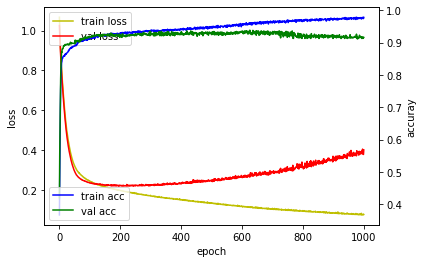

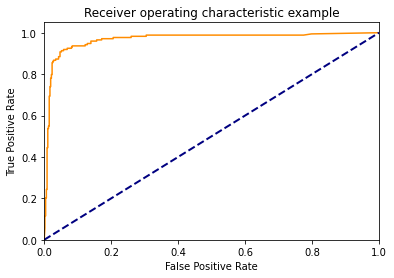


fpr : [0.         0.00214592 0.00214592 0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.02360515
 0.02360515 0.02575107 0.02575107 0.027897   0.027897   0.03433476
 0.03433476 0.04291845 0.04291845 0.0472103  0.0472103  0.05150215
 0.05150215 0.05579399 0.05793991 0.05793991 0.06866953 0.06866953
 0.08154506 0.08154506 0.08369099 0.08369099 0.1223176  0.1223176
 0.12875536 0.12875536 0.13948498 0.13948498 0.15665236 0.15665236
 0.17167382 0.17167382 0.20600858 0.20600858 0.25965665 0.25965665
 0.30472103 0.30472103 0.36480687 0.36909871 0.43133047 0.43776824
 0.43991416 0.44420601 0.44849785 0.4527897  0.45493562 0.45922747
 0.52360515 0.53004292 0.53433476 0.53862661 0.54291845 0.5472103
 0.55150215 0.55579399 0.56008584 0.57081545 0.5751073  0.58583691
 0.59012876 0.59227468 0.59656652 0.60515021 0.60944206 0

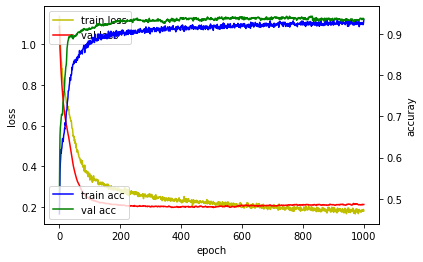

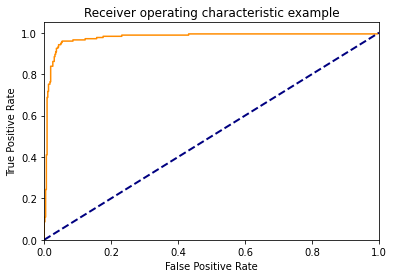


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01716738 0.01716738 0.0193133
 0.0193133  0.02575107 0.02575107 0.03004292 0.03004292 0.03218884
 0.03218884 0.03433476 0.03433476 0.03648069 0.03648069 0.04077253
 0.04077253 0.04291845 0.04291845 0.04935622 0.04935622 0.05150215
 0.05150215 0.05364807 0.05364807 0.08583691 0.08583691 0.1223176
 0.1223176  0.15665236 0.15665236 0.17596567 0.17596567 0.23175966
 0.23175966 0.31330472 0.32188841 0.43133047 0.43133047 0.46566524
 0.46995708 0.47424893 0.47854077 0.50429185 0.50858369 0.61373391
 0.61802575 0.67167382 0.67596567 0.69957082 0.70386266 0.7167382
 0.72103004 0.7360515  0.74034335 0.74248927 0.74678112 0.75321888
 0.75965665 0.7639485  0.76824034 0.77038627 0.77896996 0.78540773
 0.78969957 0.80042918 0.80901288 0.81974249 0.82403433 0.84549356
 0.84978541 0.86480687 0.86909871 0.8776824  0.88626609 0.

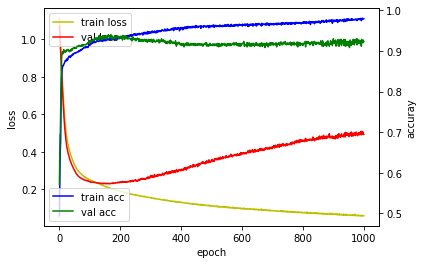

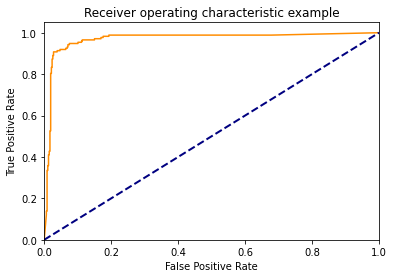


fpr : [0.         0.00643777 0.00643777 0.00858369 0.00858369 0.00858369
 0.01072961 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146
 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923
 0.02360515 0.02360515 0.02575107 0.02575107 0.027897   0.027897
 0.03862661 0.03862661 0.04291845 0.0472103  0.0472103  0.06437768
 0.06437768 0.06866953 0.06866953 0.07081545 0.07081545 0.0751073
 0.0751073  0.10085837 0.10085837 0.11158798 0.11158798 0.11373391
 0.11373391 0.15021459 0.15021459 0.1695279  0.1695279  0.17596567
 0.17596567 0.19313305 0.19313305 0.41416309 0.41845494 0.42274678
 0.42703863 0.43133047 0.43562232 0.48283262 0.48712446 0.49356223
 0.50214592 0.50643777 0.51287554 0.5193133  0.53218884 0.54077253
 0.5472103  0.54935622 0.55579399 0.56008584 0.56652361 0.5751073
 0.57939914 0.59227468 0.60300429 0.61158798 0.61802575 0.63948498
 0.66309013 0.67811159 1.        ]

tpr : [0.         0.12138728 0.13872832 0.13872832 0.1734104  0.33526012
 0.33526012 0.358

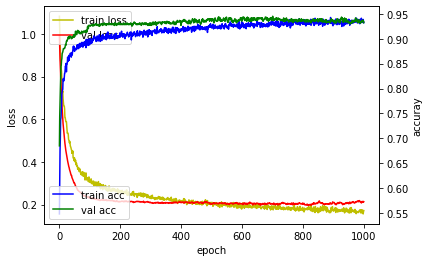

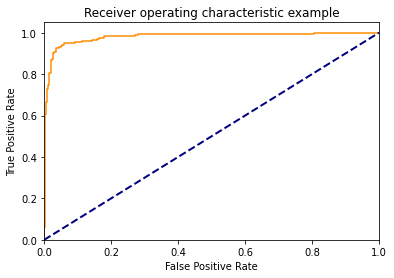


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00858369 0.00858369 0.01072961 0.01072961 0.01287554
 0.01287554 0.01502146 0.01502146 0.0193133  0.0193133  0.02145923
 0.02145923 0.02360515 0.02360515 0.02575107 0.02575107 0.027897
 0.027897   0.03433476 0.03433476 0.03648069 0.03648069 0.04506438
 0.04506438 0.05150215 0.05150215 0.05364807 0.05364807 0.05793991
 0.05793991 0.09227468 0.09227468 0.11158798 0.11158798 0.1416309
 0.1416309  0.15879828 0.15879828 0.16309013 0.16309013 0.17811159
 0.17811159 0.27038627 0.27038627 0.28111588 0.28111588 0.49141631
 0.49570815 0.52360515 0.527897   0.53648069 0.54077253 0.56223176
 0.56652361 0.61373391 0.61802575 0.62017167 0.62446352 0.65021459
 0.65450644 0.65879828 0.66309013 0.71244635 0.7167382  0.79399142
 0.79828326 0.80042918 0.80472103 0.80472103 0.82188841 0.82832618
 0.83261803 0.83690987 0.84334764 0.84549356 0.85193133 0.85407725
 0.8583691  0.87339056 0.88626609 0.89055794 0.90343348 0.

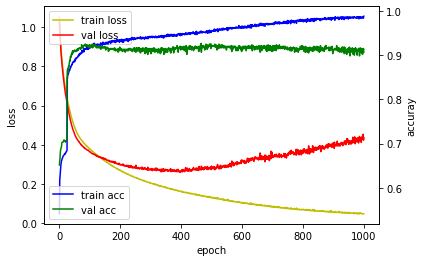

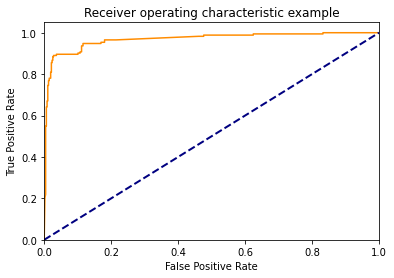


fpr : [0.         0.00214592 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03648069 0.03648069 0.10085837
 0.10085837 0.10515021 0.10729614 0.10729614 0.11158798 0.11158798
 0.11587983 0.11587983 0.1695279  0.1695279  0.18025751 0.18025751
 0.21459227 0.46137339 0.47639485 0.47639485 0.51287554 0.51716738
 0.62446352 0.62446352 0.63090129 0.63519313 0.68669528 0.69098712
 0.80901288 0.81330472 0.83261803 0.83261803 0.85622318 0.86051502
 0.86480687 0.86909871 0.89484979 0.89914163 0.93347639 0.93776824
 0.94420601 0.95064378 0.95922747 0.96351931 0.96995708 0.97639485
 0.98497854 0.98927039 0.99356223 0.99785408 1.        ]

tpr : [0.         0.20231214 0.21965318 0.22543353 0.24277457 0.25433526
 0.54913295 0.54913295 0.6416185  0.6416185  0.67052023 0.6

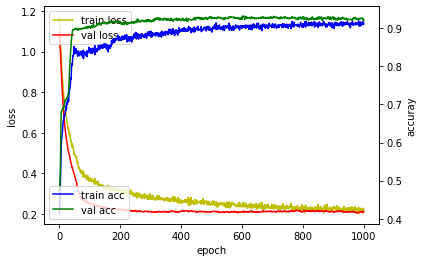

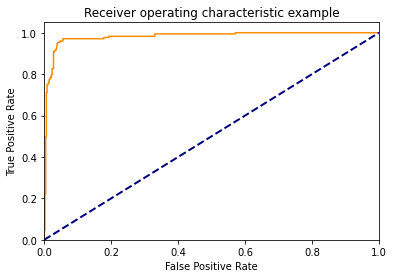


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01287554
 0.01287554 0.01502146 0.01502146 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.027897
 0.027897   0.03004292 0.03004292 0.03433476 0.03433476 0.03648069
 0.03648069 0.03862661 0.03862661 0.04077253 0.04077253 0.0472103
 0.0472103  0.05579399 0.05579399 0.17811159 0.17811159 0.19313305
 0.19313305 0.3304721  0.3304721  0.48283262 0.48712446 0.51502146
 0.5193133  0.53433476 0.53862661 0.57081545 0.57081545 0.57725322
 0.58154506 0.58369099 0.58798283 0.61587983 0.62446352 0.65236052
 0.65665236 0.67381974 0.68240343 0.69313305 0.69742489 0.69957082
 0.70386266 0.70815451 0.71244635 0.72532189 0.73175966 0.7360515
 0.73819742 0.74248927 0.74463519 0.74892704 0.75107296 0.75536481
 0.76180258 0.77467811 0.78111588 0.78540773 0.78969957 0.79184549
 0.79613734 0.80257511 0.80686695 0.81759657 0.82618026 0.83

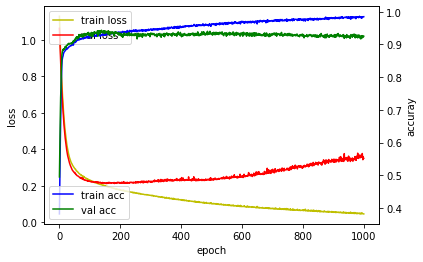

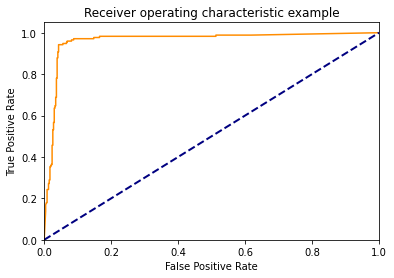


fpr : [0.         0.00429185 0.00429185 0.00643777 0.00858369 0.00858369
 0.00858369 0.00858369 0.01287554 0.01287554 0.01502146 0.01502146
 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923
 0.02360515 0.02360515 0.02575107 0.02575107 0.027897   0.027897
 0.03004292 0.03004292 0.03218884 0.03218884 0.03433476 0.03433476
 0.03648069 0.03648069 0.03862661 0.03862661 0.04077253 0.04077253
 0.04291845 0.04291845 0.05579399 0.05579399 0.06652361 0.06652361
 0.06866953 0.06866953 0.08154506 0.08154506 0.08798283 0.08798283
 0.14806867 0.14806867 0.16523605 0.16523605 0.31545064 0.31974249
 0.37124464 0.37553648 0.40128755 0.4055794  0.41845494 0.42274678
 0.4248927  0.42918455 0.43562232 0.44420601 0.45922747 0.46351931
 0.46566524 0.46995708 0.472103   0.47639485 0.48927039 0.49570815
 0.49785408 0.50429185 0.50858369 0.51287554 0.51287554 0.51716738
 0.52360515 0.52575107 0.53433476 0.5472103  0.55793991 0.58369099
 0.61802575 1.        ]

tpr : [0.         0.13872832 0.1

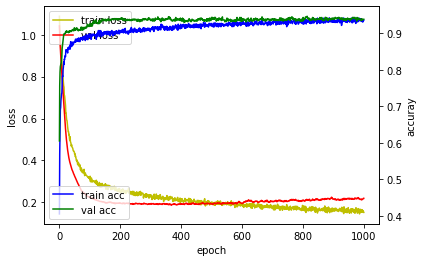

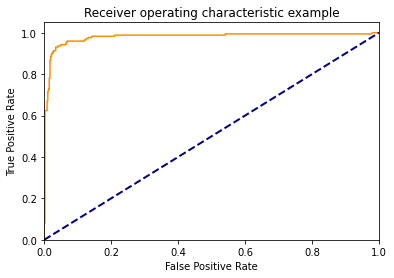


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00858369
 0.00858369 0.01072961 0.01072961 0.01287554 0.01287554 0.01502146
 0.01502146 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923
 0.02145923 0.02360515 0.02360515 0.02575107 0.02575107 0.027897
 0.027897   0.03433476 0.03433476 0.04077253 0.04077253 0.04935622
 0.04935622 0.06437768 0.06437768 0.06652361 0.06652361 0.06866953
 0.06866953 0.12017167 0.12017167 0.12446352 0.12446352 0.13090129
 0.13090129 0.1416309  0.1416309  0.18025751 0.18454936 0.21030043
 0.21030043 0.30472103 0.30901288 0.37553648 0.37982833 0.47639485
 0.4806867  0.54077253 0.54077253 0.6223176  0.62660944 0.66309013
 0.66738197 0.67167382 0.67596567 0.69098712 0.69527897 0.84334764
 0.84763948 0.87124464 0.87553648 0.8776824  0.88626609 0.89699571
 0.90128755 0.90343348 0.90772532 0.91416309 0.92274678 0.92918455
 0.93776824 0.94635193 0.95064378 0.95493562 0.96137339 0.96995708
 0.97639485 0.9806867  0.98283262 0.98927039 0.99141631 0

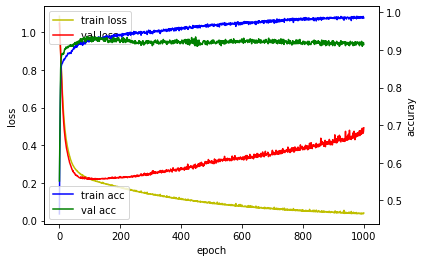

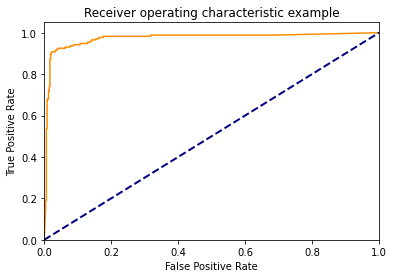


fpr : [0.         0.00429185 0.00429185 0.00429185 0.00429185 0.00643777
 0.00643777 0.00643777 0.00643777 0.00643777 0.00643777 0.00858369
 0.00858369 0.01072961 0.01072961 0.01287554 0.01287554 0.01502146
 0.01502146 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923
 0.02145923 0.03218884 0.03218884 0.03648069 0.03648069 0.04077253
 0.04077253 0.06223176 0.06223176 0.07725322 0.07725322 0.08798283
 0.08798283 0.10729614 0.10729614 0.12875536 0.12875536 0.13733906
 0.13733906 0.1416309  0.1416309  0.15021459 0.15450644 0.15450644
 0.16309013 0.16309013 0.17596567 0.17596567 0.31759657 0.31759657
 0.35193133 0.36051502 0.38841202 0.39699571 0.4055794  0.40987124
 0.41845494 0.42274678 0.49570815 0.50429185 0.50643777 0.51072961
 0.5193133  0.52360515 0.52575107 0.53004292 0.53218884 0.53648069
 0.53862661 0.55793991 0.56223176 0.56866953 0.57081545 0.57939914
 0.58798283 0.59012876 0.59871245 0.60729614 0.61802575 0.6223176
 0.63090129 0.63733906 0.65021459 0.68454936 1.        ]

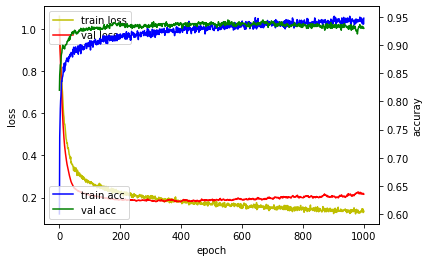

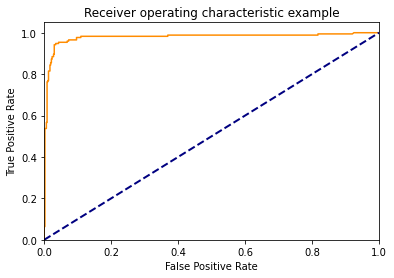


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00643777
 0.00643777 0.00858369 0.00858369 0.01072961 0.01072961 0.01287554
 0.01287554 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923
 0.02145923 0.02360515 0.02360515 0.027897   0.027897   0.03004292
 0.03004292 0.03433476 0.03433476 0.04291845 0.04291845 0.06866953
 0.06866953 0.07296137 0.07296137 0.09656652 0.09656652 0.10944206
 0.10944206 0.36909871 0.36909871 0.46995708 0.47424893 0.49141631
 0.49570815 0.64806867 0.65236052 0.6695279  0.67381974 0.68240343
 0.68669528 0.72746781 0.73175966 0.81759657 0.81759657 0.83261803
 0.83690987 0.84549356 0.85193133 0.86051502 0.86695279 0.87124464
 0.87982833 0.88626609 0.89055794 0.89484979 0.90343348 0.9055794
 0.91416309 0.91845494 0.92060086 0.9248927  0.94206009 0.96781116
 0.99356223 0.99785408 1.        ]

tpr : [0.         0.04624277 0.06358382 0.06358382 0.53757225 0.53757225
 0.56647399 0.56647399 0.76300578 0.76300578 0.76878613 0.76878613
 0.8150289  0.

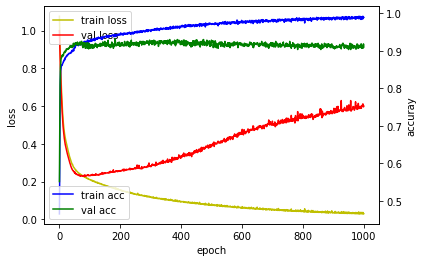

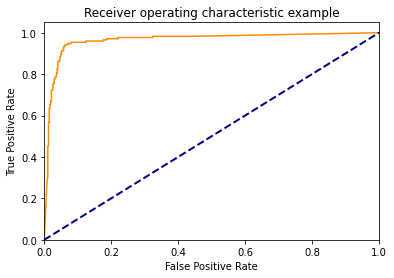


fpr : [0.         0.00858369 0.01072961 0.01072961 0.01072961 0.01072961
 0.01072961 0.01072961 0.01072961 0.01287554 0.01287554 0.01502146
 0.01502146 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923
 0.02145923 0.02575107 0.02575107 0.027897   0.027897   0.03004292
 0.03004292 0.03218884 0.03218884 0.03648069 0.03648069 0.03862661
 0.03862661 0.04077253 0.04077253 0.04506438 0.04506438 0.0472103
 0.0472103  0.04935622 0.04935622 0.05150215 0.05150215 0.05793991
 0.05793991 0.06008584 0.06008584 0.06223176 0.06223176 0.07081545
 0.07081545 0.08154506 0.08154506 0.12446352 0.12446352 0.17596567
 0.17596567 0.18669528 0.18669528 0.22103004 0.22103004 0.30042918
 0.30472103 0.3111588  0.31759657 0.32188841 0.32403433 0.32403433
 0.32618026 0.3304721  0.33476395 0.34120172 0.34549356 0.35407725
 0.36051502 0.36480687 0.36695279 0.37124464 0.37553648 0.37982833
 0.38197425 0.38626609 0.39914163 0.42274678 0.44420601 1.        ]

tpr : [0.         0.28323699 0.30635838 0.31791908 0.3

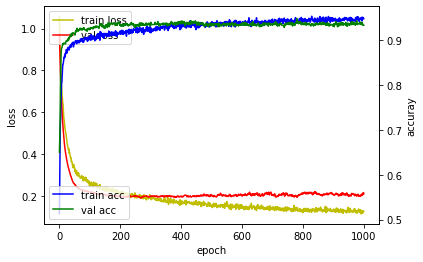

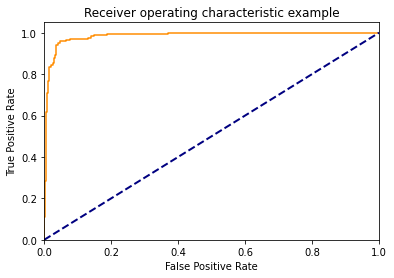


fpr : [0.         0.         0.         0.         0.00214592 0.00214592
 0.00429185 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369
 0.01072961 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146
 0.0193133  0.0193133  0.02145923 0.02145923 0.02575107 0.02575107
 0.027897   0.027897   0.03004292 0.03004292 0.03218884 0.03218884
 0.03433476 0.03433476 0.03648069 0.03648069 0.04077253 0.04077253
 0.0472103  0.0472103  0.06652361 0.06652361 0.07725322 0.07725322
 0.13090129 0.13090129 0.13948498 0.13948498 0.14806867 0.14806867
 0.1888412  0.1888412  0.37124464 0.37124464 0.37553648 0.37982833
 0.39699571 0.40128755 0.472103   0.47639485 0.60944206 0.61373391
 0.65021459 0.65450644 0.71888412 0.72317597 0.74678112 0.75107296
 0.75321888 0.75751073 0.76609442 0.77253219 0.82618026 0.85193133
 0.8583691  0.86266094 0.87124464 0.87553648 0.89270386 0.89699571
 0.90987124 0.91201717 0.92060086 0.9248927  0.93347639 0.93991416
 0.95064378 0.96781116 0.98283262 0.99570815 1.        

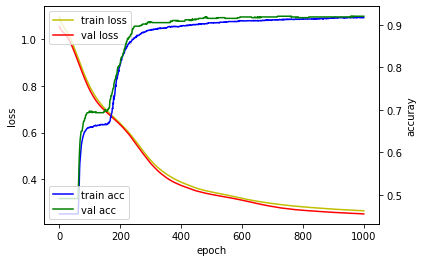

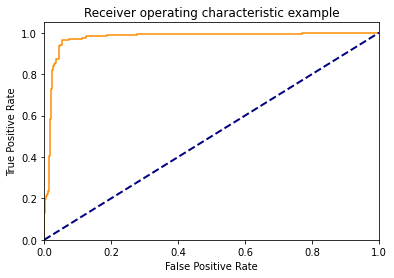


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.02360515
 0.02360515 0.02575107 0.02575107 0.027897   0.027897   0.03218884
 0.03218884 0.03433476 0.03433476 0.03648069 0.03648069 0.04291845
 0.04291845 0.04506438 0.04506438 0.0472103  0.0472103  0.05364807
 0.05364807 0.0751073  0.0751073  0.11158798 0.11158798 0.12446352
 0.12446352 0.18669528 0.18669528 0.27682403 0.27682403 0.35622318
 0.36051502 0.36480687 0.36909871 0.40128755 0.4055794  0.6223176
 0.62660944 0.6695279  0.67381974 0.7167382  0.72103004 0.73819742
 0.74248927 0.77038627 0.77038627 0.95708155 0.96137339 1.        ]

tpr : [0.         0.00578035 0.12716763 0.12716763 0.19653179 0.19653179
 0.20231214 0.20231214 0.21387283 0.21387283 0.21965318 0.21965318
 0.23699422 0.23699422 0.33526012 0.33526012 0.4

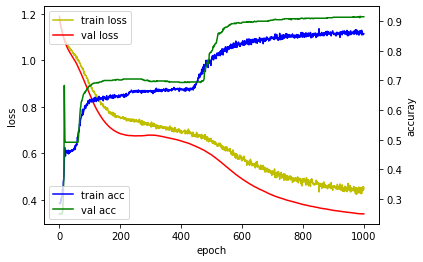

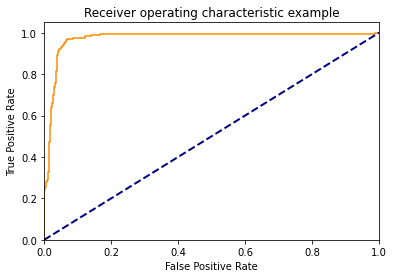


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.02145923 0.02145923 0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03004292 0.03004292 0.03218884
 0.03218884 0.03433476 0.03433476 0.03648069 0.03648069 0.03862661
 0.03862661 0.04077253 0.04077253 0.04291845 0.04291845 0.05150215
 0.05150215 0.05364807 0.05364807 0.05579399 0.05579399 0.05793991
 0.05793991 0.06223176 0.06223176 0.06437768 0.06437768 0.06652361
 0.06652361 0.06866953 0.06866953 0.08583691 0.08583691 0.1223176
 0.1223176  0.13948498 0.13948498 0.16738197 0.16738197 0.39055794
 0.39484979 0.60729614 0.61158798 0.66523605 0.6695279  0.67596567
 0.68025751 0.69313305 0.69742489 0.70815451 0.71244635 0.98927039
 0.98927039 1.        ]

tpr : [0.         0.00578035 0.24277457 0.24277457 0.25433526 0.25433526
 0.26011561 0.26011561 0.

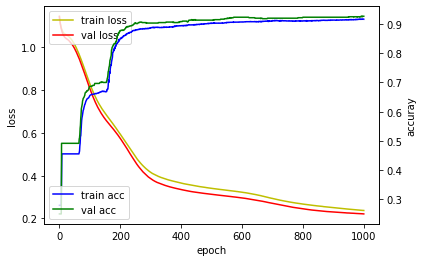

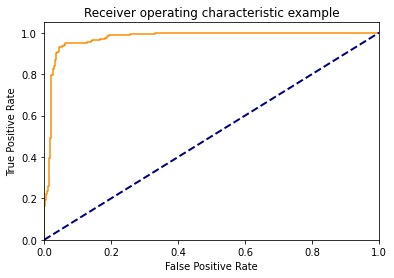


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.02575107
 0.02575107 0.03004292 0.03004292 0.03218884 0.03218884 0.03648069
 0.03648069 0.03862661 0.03862661 0.04291845 0.04291845 0.04506438
 0.04506438 0.05364807 0.05364807 0.06008584 0.06008584 0.06223176
 0.06223176 0.12660944 0.12660944 0.13948498 0.13948498 0.1416309
 0.1416309  0.16738197 0.16738197 0.18240343 0.18240343 0.1888412
 0.1888412  0.19313305 0.19313305 0.25751073 0.25751073 0.3304721
 0.3304721  0.4055794  0.40987124 0.51287554 0.51716738 0.55579399
 0.56008584 0.58369099 0.58798283 0.72317597 0.72746781 0.75321888
 0.75751073 0.90128755 0.9055794  1.        ]

tpr : [0.         0.00578035 0.16184971 0.16184971 0.19075145 0.19075145
 0.19653179 0.19653179 0.21965318 0.21965318 0.23699422 0.23699422
 0.26

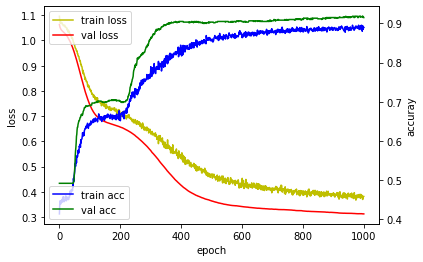

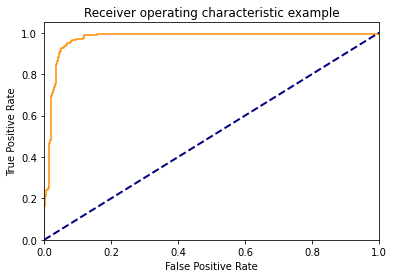


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.01072961 0.01072961 0.01287554
 0.01287554 0.01502146 0.01502146 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03218884 0.03218884 0.03433476
 0.03433476 0.03648069 0.03648069 0.03862661 0.03862661 0.04077253
 0.04077253 0.04291845 0.04291845 0.04506438 0.04506438 0.0472103
 0.0472103  0.04935622 0.04935622 0.05150215 0.05150215 0.05793991
 0.05793991 0.06008584 0.06008584 0.06652361 0.06652361 0.06866953
 0.06866953 0.07725322 0.07725322 0.07939914 0.07939914 0.08369099
 0.08369099 0.0944206  0.0944206  0.11587983 0.11587983 0.11802575
 0.11802575 0.12017167 0.12017167 0.15665236 0.15665236 0.1888412
 0.19313305 0.27682403 0.28111588 0.30042918 0.30472103 0.33905579
 0.34334764 0.51287554 0.51716738 0.6695279  0.67381974 1.
 1.        ]

tpr : [0.         0.00578035 0.16184971 0.16184971 0

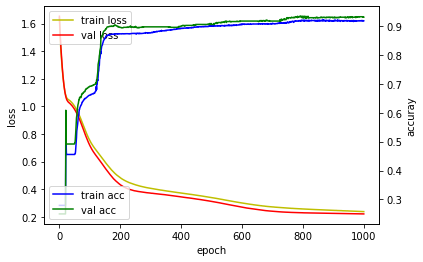

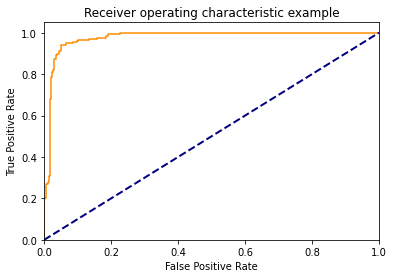


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.01072961 0.01072961 0.01502146
 0.01502146 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923
 0.02145923 0.02360515 0.02360515 0.02575107 0.02575107 0.027897
 0.027897   0.03004292 0.03004292 0.03433476 0.03433476 0.03648069
 0.03648069 0.03862661 0.03862661 0.04291845 0.04506438 0.04506438
 0.04935622 0.04935622 0.05150215 0.05150215 0.06652361 0.06652361
 0.08583691 0.08583691 0.09871245 0.09871245 0.10085837 0.10085837
 0.13519313 0.13519313 0.15665236 0.15665236 0.18454936 0.18454936
 0.19098712 0.19098712 0.22532189 0.22532189 0.36051502 0.36480687
 0.55579399 0.56008584 0.59656652 0.60085837 0.64592275 0.65021459
 0.70386266 0.70815451 0.72532189 0.72961373 0.76609442 0.77038627
 0.95708155 0.96137339 0.98712446 0.99141631 1.        ]

tpr : [0.         0.00578035 0.19653179 0.19653179 0.20231214 0.20231214
 0.24855491 0.24855491 0.2716763  0.2716763  0.27745665 0.27

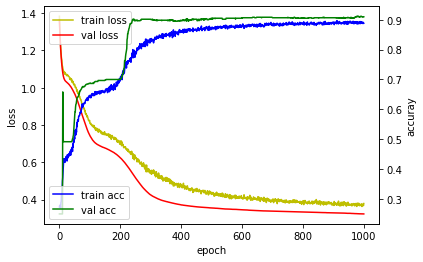

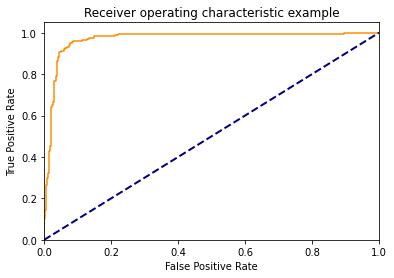


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00643777
 0.00643777 0.00858369 0.00858369 0.01072961 0.01072961 0.01287554
 0.01287554 0.01502146 0.01502146 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03004292 0.03004292 0.03433476
 0.03433476 0.03648069 0.03648069 0.03862661 0.03862661 0.04077253
 0.04077253 0.04291845 0.04291845 0.05150215 0.05150215 0.05793991
 0.05793991 0.06223176 0.06223176 0.06866953 0.06866953 0.07296137
 0.07296137 0.0751073  0.0751073  0.07725322 0.07725322 0.08154506
 0.08154506 0.08583691 0.08583691 0.11158798 0.11158798 0.12875536
 0.12875536 0.13519313 0.13519313 0.14806867 0.14806867 0.21244635
 0.21244635 0.22103004 0.22103004 0.31974249 0.32403433 0.55150215
 0.55579399 0.64377682 0.64806867 0.68025751 0.68454936 0.68669528
 0.69527897 0.89484979 0.89484979 1.        ]

tpr : [0.         0.00578035 0.0982659  0.0982659  0.14450867 0.14450867
 0.

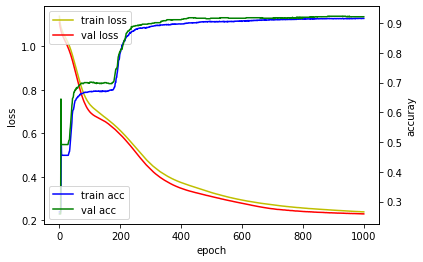

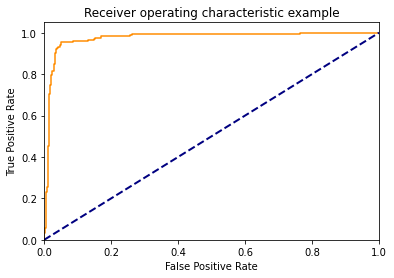


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.02145923 0.02145923 0.02360515 0.02360515 0.027897
 0.027897   0.03218884 0.03218884 0.03433476 0.03433476 0.03862661
 0.03862661 0.04077253 0.04077253 0.0472103  0.0472103  0.04935622
 0.04935622 0.08583691 0.08583691 0.13090129 0.13090129 0.15021459
 0.15021459 0.15236052 0.15236052 0.1695279  0.1695279  0.25536481
 0.25536481 0.26180258 0.26180258 0.46137339 0.46566524 0.46995708
 0.47424893 0.4806867  0.48497854 0.5        0.50429185 0.527897
 0.53218884 0.6416309  0.64592275 0.7639485  0.7639485  1.        ]

tpr : [0.         0.00578035 0.03468208 0.03468208 0.05780347 0.05780347
 0.16184971 0.16184971 0.23121387 0.23121387 0.25433526 0.25433526
 0.45086705 0.45086705 0.46820809 0.46820809 0.70520231 0.70520231
 0.74566474 0.74566474 0.79768786 0.79768786 0.8150

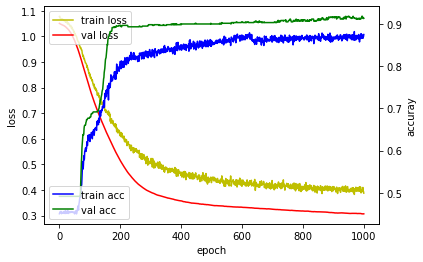

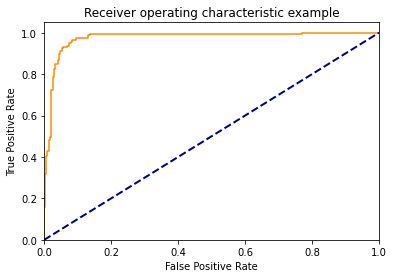


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00858369 0.00858369 0.01287554 0.01287554 0.01502146
 0.01502146 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923
 0.02145923 0.02575107 0.02575107 0.027897   0.027897   0.03004292
 0.03004292 0.03218884 0.03218884 0.04077253 0.04077253 0.04291845
 0.04291845 0.04506438 0.04506438 0.0472103  0.0472103  0.05364807
 0.05364807 0.05579399 0.05579399 0.06866953 0.06866953 0.07296137
 0.07296137 0.07939914 0.07939914 0.08154506 0.08154506 0.0944206
 0.0944206  0.13090129 0.13090129 0.13733906 0.13733906 0.35407725
 0.3583691  0.54291845 0.5472103  0.60944206 0.61373391 0.65450644
 0.65879828 0.66738197 0.67596567 0.77038627 0.77038627 1.        ]

tpr : [0.         0.00578035 0.15606936 0.15606936 0.31791908 0.31791908
 0.40462428 0.40462428 0.42774566 0.42774566 0.47398844 0.47398844
 0.47976879 0.47976879 0.49710983 0.49710983 0.52601156 0.52601156
 0.72254335 0.72254335 0.78612717 0.78612717 0.8

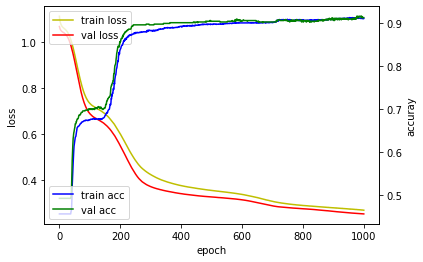

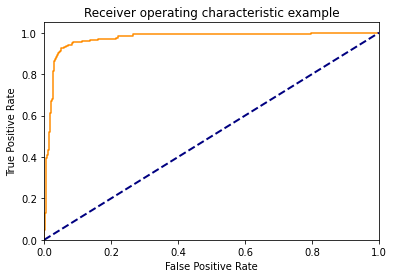


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03218884 0.03218884 0.03433476
 0.03433476 0.03648069 0.03648069 0.03862661 0.03862661 0.04077253
 0.04077253 0.04506438 0.04506438 0.0472103  0.0472103  0.05150215
 0.05150215 0.06008584 0.06008584 0.06437768 0.06437768 0.07081545
 0.07081545 0.08154506 0.08154506 0.08583691 0.08583691 0.11158798
 0.11158798 0.13733906 0.13733906 0.16094421 0.16094421 0.21459227
 0.21459227 0.22103004 0.22103004 0.26609442 0.26609442 0.4248927
 0.42918455 0.50858369 0.51287554 0.5751073  0.57939914 0.62446352
 0.62875536 0.67596567 0.68025751 0.70600858 0.71030043 0.79613734
 0.79613734 1.        ]

tpr : [0.         0.00578035 0.04624277 0.04624277 0.12716763 0.12716763
 0.24855491 0.24855491 0.

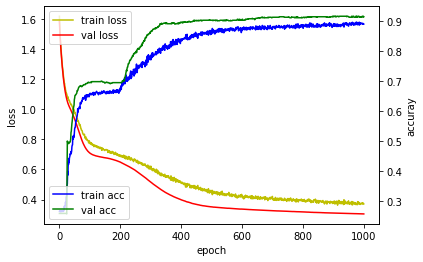

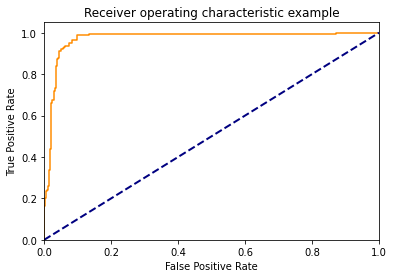


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00858369 0.00858369 0.01072961 0.01072961 0.01287554
 0.01287554 0.01502146 0.01502146 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.027897
 0.027897   0.03004292 0.03004292 0.03218884 0.03218884 0.03433476
 0.03433476 0.03648069 0.03648069 0.03862661 0.03862661 0.04077253
 0.04077253 0.04291845 0.04291845 0.05150215 0.05150215 0.05579399
 0.05579399 0.06008584 0.06008584 0.06223176 0.06223176 0.07296137
 0.07296137 0.08154506 0.08154506 0.08369099 0.08369099 0.09656652
 0.09656652 0.09871245 0.09871245 0.13519313 0.13519313 0.43562232
 0.43991416 0.52145923 0.52575107 0.58369099 0.58798283 0.60515021
 0.60944206 0.6223176  0.62660944 0.65450644 0.65879828 0.6888412
 0.69313305 0.87124464 0.87124464 1.        ]

tpr : [0.         0.00578035 0.16184971 0.16184971 0.20231214 0.20231214
 0.23699422 0.23699422 0.24277457 0.24277457 0.26011561 0.26011561
 0.306

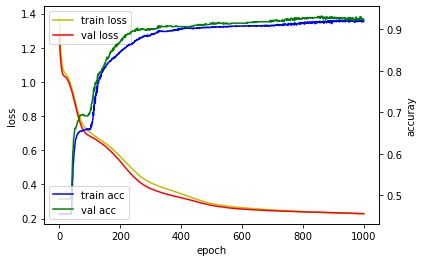

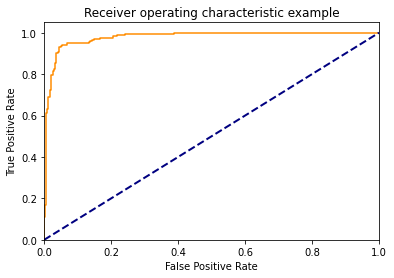


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923
 0.02145923 0.02575107 0.02575107 0.027897   0.027897   0.03004292
 0.03004292 0.03218884 0.03218884 0.03648069 0.03648069 0.04077253
 0.04077253 0.04506438 0.04506438 0.05150215 0.05150215 0.05364807
 0.05364807 0.06866953 0.06866953 0.13304721 0.13304721 0.13733906
 0.13733906 0.14377682 0.14377682 0.14806867 0.14806867 0.16523605
 0.16523605 0.20600858 0.20600858 0.2167382  0.2167382  0.24248927
 0.24248927 0.31545064 0.31974249 0.3583691  0.36266094 0.38841202
 0.38841202 0.42060086 0.4248927  0.54077253 0.54935622 0.55579399
 0.56008584 0.74248927 0.74678112 0.94206009 0.94635193 0.97639485
 0.9806867  1.        ]

tpr : [0.         0.00578035 0.10982659 0.10982659 0.16763006 0.16763006
 0.28323699 0.28323699 0.61271676 0.61271676 0.6300578  0.6300578
 0.68786127 0.68786127 0.

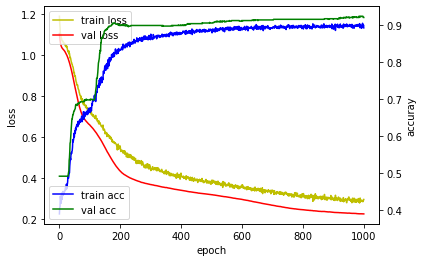

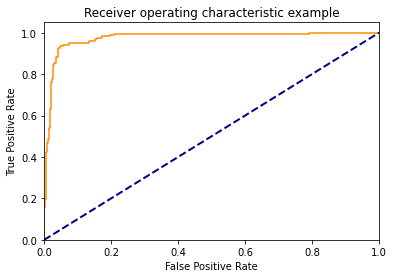


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00643777
 0.00643777 0.00858369 0.00858369 0.01072961 0.01072961 0.01287554
 0.01287554 0.01502146 0.01502146 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03004292 0.03004292 0.03433476
 0.03433476 0.03648069 0.03648069 0.04077253 0.04077253 0.0472103
 0.0472103  0.05579399 0.05579399 0.07296137 0.07296137 0.13519313
 0.13519313 0.15236052 0.15236052 0.15879828 0.15879828 0.17381974
 0.17381974 0.19527897 0.19527897 0.20815451 0.20815451 0.4055794
 0.40987124 0.41845494 0.42274678 0.43991416 0.44420601 0.66309013
 0.66738197 0.68240343 0.68669528 0.70171674 0.70600858 0.72317597
 0.72746781 0.79184549 0.79184549 1.        ]

tpr : [0.         0.00578035 0.15606936 0.15606936 0.19653179 0.19653179
 0.42196532 0.42196532 0.46820809 0.46820809 0.48554913 0.48554913
 0.49132948 0.49132948 0.53757225 0.53757225 0.6300578  0.6300578
 0.739

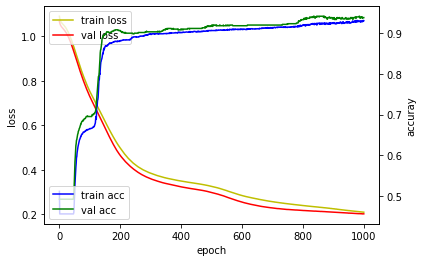

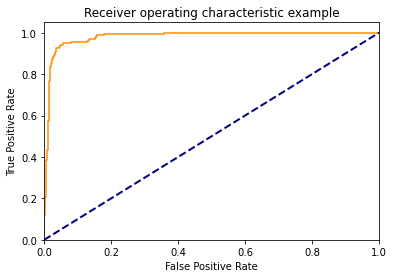


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03218884 0.03218884 0.03433476
 0.03433476 0.03648069 0.03648069 0.04506438 0.04506438 0.0472103
 0.0472103  0.05579399 0.05579399 0.07939914 0.07939914 0.12660944
 0.12660944 0.13304721 0.13304721 0.15236052 0.15236052 0.15450644
 0.15450644 0.15879828 0.15879828 0.16094421 0.16523605 0.17811159
 0.17811159 0.33261803 0.34120172 0.3583691  0.3583691  0.51716738
 0.52145923 0.56008584 0.56437768 0.57296137 0.57725322 0.62660944
 0.63090129 0.72746781 0.73175966 0.88197425 0.88626609 1.        ]

tpr : [0.         0.00578035 0.12138728 0.12138728 0.20809249 0.20809249
 0.28323699 0.28323699 0.38728324 0.38728324 0.43352601 0.43352601
 0.57225434 0.57225434 0.61271676 0.61271676 0.7

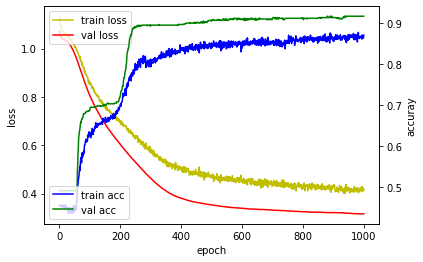

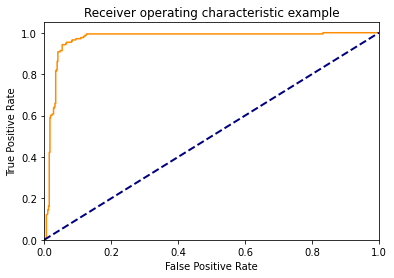


fpr : [0.         0.         0.00643777 0.00643777 0.00643777 0.00643777
 0.00643777 0.00643777 0.00643777 0.00643777 0.00643777 0.00858369
 0.01072961 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146
 0.01716738 0.01716738 0.0193133  0.0193133  0.02360515 0.02360515
 0.027897   0.027897   0.03004292 0.03004292 0.03218884 0.03218884
 0.03433476 0.03433476 0.03648069 0.03648069 0.03862661 0.03862661
 0.04077253 0.04077253 0.0472103  0.0472103  0.05364807 0.05364807
 0.06437768 0.06437768 0.06652361 0.06652361 0.08154506 0.08154506
 0.08369099 0.08369099 0.0944206  0.0944206  0.10944206 0.10944206
 0.11802575 0.11802575 0.1223176  0.1223176  0.12660944 0.12660944
 0.15236052 0.15665236 0.24248927 0.24678112 0.2639485  0.26824034
 0.28969957 0.29399142 0.30042918 0.30472103 0.49785408 0.50214592
 0.60729614 0.61158798 0.83261803 0.83261803 1.        ]

tpr : [0.         0.00578035 0.00578035 0.01156069 0.02890173 0.04046243
 0.05780347 0.06936416 0.08092486 0.09248555 0.12138728 0.

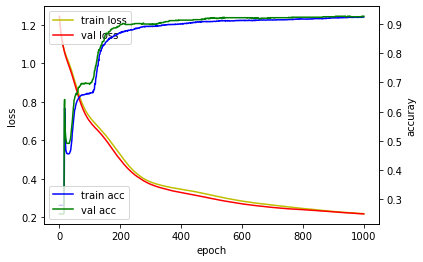

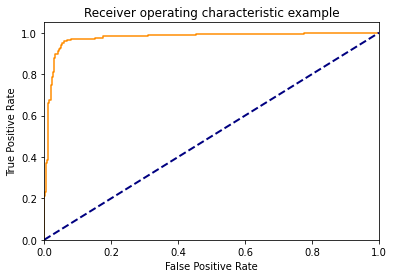


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01502146 0.01502146 0.0193133  0.0193133  0.02145923
 0.02145923 0.02360515 0.02360515 0.02575107 0.02575107 0.027897
 0.027897   0.03218884 0.03218884 0.04077253 0.04077253 0.04291845
 0.04291845 0.0472103  0.0472103  0.04935622 0.04935622 0.05364807
 0.05364807 0.06008584 0.06008584 0.06866953 0.06866953 0.07939914
 0.07939914 0.1416309  0.14592275 0.15236052 0.15236052 0.17596567
 0.17596567 0.30901288 0.30901288 0.44206009 0.44635193 0.4527897
 0.4527897  0.48927039 0.49356223 0.527897   0.53218884 0.59871245
 0.60300429 0.72746781 0.73175966 0.75536481 0.75965665 0.77467811
 0.77467811 0.81974249 0.82403433 0.91201717 0.91630901 0.92274678
 0.92703863 1.        ]

tpr : [0.         0.00578035 0.21387283 0.21387283 0.23121387 0.23121387
 0.24855491 0.24855491 0.3699422  0.3699422  0.38728324 0.38728324
 0.65895954 0.65895954 0.67

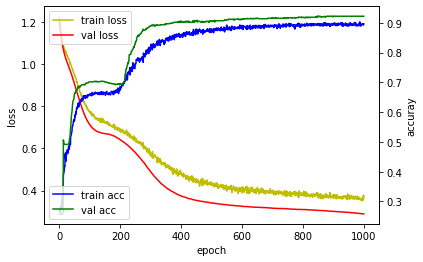

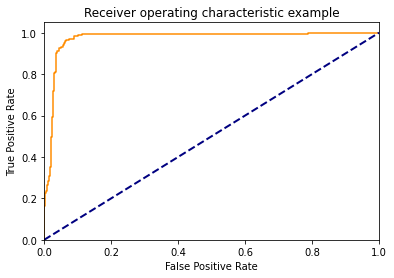


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00858369 0.00858369 0.01072961 0.01072961 0.01287554
 0.01287554 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923
 0.02145923 0.02360515 0.02360515 0.02575107 0.02575107 0.027897
 0.027897   0.03004292 0.03004292 0.03218884 0.03218884 0.03433476
 0.03433476 0.03648069 0.03648069 0.03862661 0.03862661 0.04291845
 0.04291845 0.04935622 0.04935622 0.05579399 0.05579399 0.05793991
 0.05793991 0.06223176 0.06223176 0.06437768 0.06437768 0.0751073
 0.0751073  0.08798283 0.08798283 0.09012876 0.09012876 0.10085837
 0.10085837 0.11158798 0.11158798 0.39914163 0.40343348 0.59871245
 0.60300429 0.64592275 0.65021459 0.66309013 0.66738197 0.69313305
 0.69742489 0.72317597 0.72746781 0.78755365 0.78755365 0.95922747
 0.96351931 1.        ]

tpr : [0.         0.00578035 0.16184971 0.16184971 0.22543353 0.22543353
 0.23699422 0.23699422 0.26589595 0.26589595 0.28323699 0.28323699
 0.30635838 0.30635838 0.35

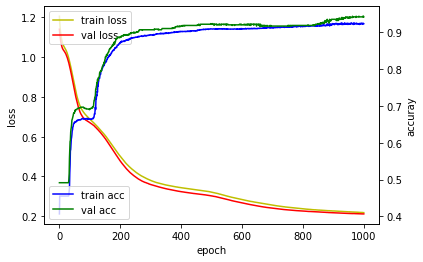

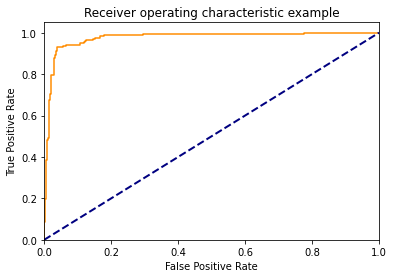


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.027897
 0.027897   0.03004292 0.03004292 0.03218884 0.03218884 0.03433476
 0.03433476 0.03648069 0.03648069 0.03862661 0.03862661 0.05579399
 0.05579399 0.06437768 0.06437768 0.10729614 0.10729614 0.11802575
 0.11802575 0.1223176  0.1223176  0.12446352 0.12446352 0.14592275
 0.14592275 0.15021459 0.15236052 0.15236052 0.16523605 0.16523605
 0.17811159 0.17811159 0.29613734 0.29613734 0.35622318 0.36051502
 0.49570815 0.5        0.51716738 0.52145923 0.56008584 0.56437768
 0.68669528 0.69098712 0.74034335 0.74463519 0.77682403 0.77682403
 0.79828326 0.80257511 0.96351931 0.96781116 1.        ]

tpr : [0.         0.00578035 0.0867052  0.0867052  0.19653179 0.19653179
 0.30057803 0.30057803 0.38728324 0.38728324 0.47976879 0.47

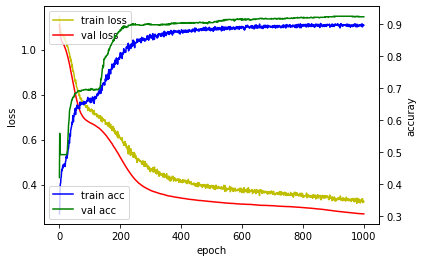

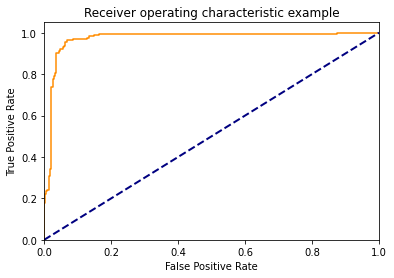


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01287554
 0.01287554 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.02575107
 0.02575107 0.027897   0.027897   0.03218884 0.03218884 0.03433476
 0.03433476 0.03648069 0.03648069 0.04291845 0.04291845 0.0472103
 0.0472103  0.05579399 0.05579399 0.05793991 0.05793991 0.06223176
 0.06223176 0.06866953 0.06866953 0.08583691 0.08583691 0.12660944
 0.12660944 0.13519313 0.13519313 0.15021459 0.15021459 0.16309013
 0.16309013 0.37553648 0.37982833 0.57725322 0.58154506 0.63948498
 0.64377682 0.64592275 0.65021459 0.71030043 0.71459227 0.72103004
 0.72532189 0.87339056 0.87339056 0.9248927  0.92918455 1.        ]

tpr : [0.         0.00578035 0.17919075 0.17919075 0.21965318 0.21965318
 0.22543353 0.22543353 0.23699422 0.23699422 0.24277457 0.24277457
 0.26011561 0.2716763  0.28901734 0.28901734 0.3

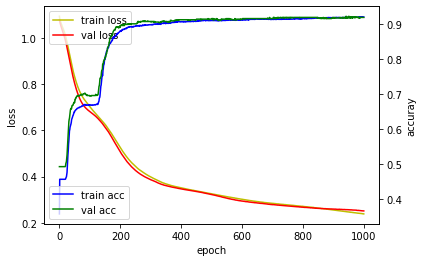

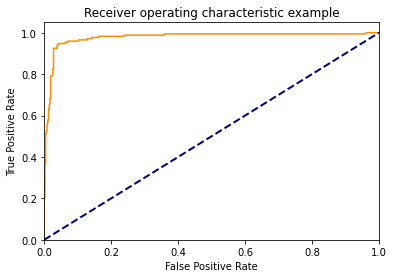


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02575107 0.02575107 0.027897
 0.027897   0.03862661 0.03862661 0.04291845 0.04291845 0.0472103
 0.05150215 0.06223176 0.06223176 0.07081545 0.07081545 0.10300429
 0.10300429 0.12875536 0.12875536 0.1416309  0.1416309  0.16309013
 0.16309013 0.23819742 0.23819742 0.3583691  0.3583691  0.44849785
 0.4527897  0.50643777 0.51072961 0.66094421 0.66523605 0.69313305
 0.69742489 0.74678112 0.75536481 0.95922747 0.96137339 1.        ]

tpr : [0.         0.00578035 0.20231214 0.20231214 0.36416185 0.36416185
 0.51445087 0.51445087 0.52601156 0.52601156 0.56069364 0.56069364
 0.57803468 0.57803468 0.6300578  0.6300578  0.65317919 0.65317919
 0.68208092 0.68208092 0.79190751 0.79190751 0.8265896  0.8265896
 0.92485549 0.92485549 0.94219653 0.94219653 0.9479

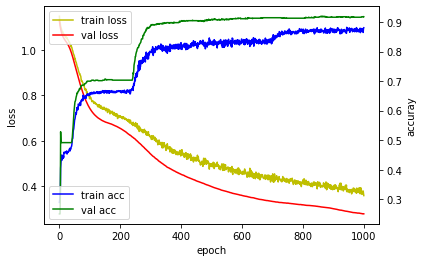

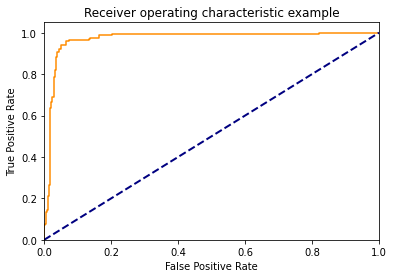


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.01716738 0.01716738 0.0193133  0.0193133  0.02360515
 0.02360515 0.027897   0.027897   0.03004292 0.03004292 0.03218884
 0.03218884 0.03433476 0.03433476 0.03648069 0.03648069 0.03862661
 0.03862661 0.04506438 0.04506438 0.04935622 0.04935622 0.05150215
 0.05150215 0.06652361 0.06652361 0.07296137 0.07296137 0.13304721
 0.13304721 0.13733906 0.13733906 0.16309013 0.16309013 0.20171674
 0.20171674 0.41416309 0.41845494 0.53218884 0.53648069 0.64806867
 0.65236052 0.66094421 0.66523605 0.73819742 0.74678112 0.80257511
 0.80686695 0.81974249 0.81974249 0.95708155 0.96137339 1.        ]

tpr : [0.         0.00578035 0.06936416 0.06936416 0.07514451 0.07514451
 0.12138728 0.12138728 0.13294798 0.13294798 0.14450867 0.14450867
 0.21387283 0.21387283 0.24855491 0.24855491 0.

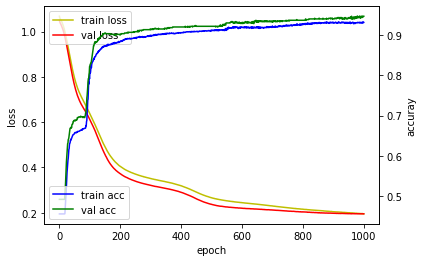

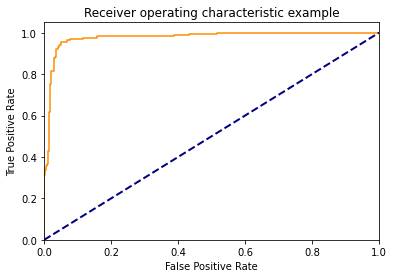


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00643777
 0.00643777 0.00858369 0.00858369 0.01072961 0.01072961 0.01287554
 0.01287554 0.01502146 0.01502146 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.027897   0.027897   0.03004292
 0.03004292 0.03218884 0.03218884 0.03433476 0.03433476 0.03648069
 0.03648069 0.04077253 0.04077253 0.04506438 0.04506438 0.04935622
 0.04935622 0.05150215 0.05150215 0.06866953 0.06866953 0.07725322
 0.07725322 0.09656652 0.10085837 0.11587983 0.11587983 0.15879828
 0.15879828 0.38626609 0.38626609 0.4055794  0.40987124 0.43133047
 0.43133047 0.44206009 0.44635193 0.51716738 0.51716738 0.53433476
 0.53862661 0.54506438 0.54935622 0.65665236 0.66094421 0.73175966
 0.7360515  0.95493562 0.95922747 1.        ]

tpr : [0.         0.00578035 0.31213873 0.31213873 0.33526012 0.33526012
 0.3583815  0.3583815  0.36416185 0.36416185 0.42774566 0.42774566
 0.51445087 0.51445087 0.61849711 0.61849711 0.75144509 0.75144509
 0.

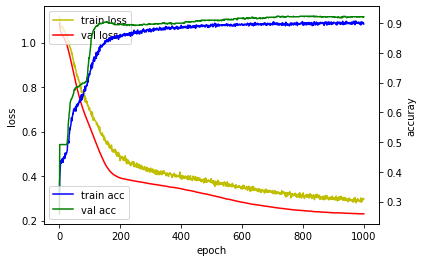

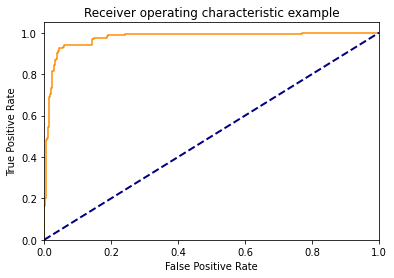


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.02360515
 0.02360515 0.027897   0.027897   0.03004292 0.03004292 0.03218884
 0.03218884 0.03433476 0.03433476 0.03862661 0.03862661 0.04077253
 0.04077253 0.04506438 0.04506438 0.05579399 0.05579399 0.06008584
 0.06008584 0.1416309  0.1416309  0.14806867 0.14806867 0.18669528
 0.18669528 0.19098712 0.19098712 0.24248927 0.24248927 0.39699571
 0.40128755 0.60729614 0.61158798 0.63733906 0.6416309  0.66738197
 0.67167382 0.73390558 0.73819742 0.74892704 0.75321888 0.77038627
 0.77038627 1.        ]

tpr : [0.         0.00578035 0.16184971 0.16184971 0.20231214 0.20231214
 0.24277457 0.24277457 0.47976879 0.47976879 0.49132948 0.49132948
 0.5433526  0.5433526  0.61849711 0.61849711 0.68786127 0.68786127
 0.70520231 0.70520231 0

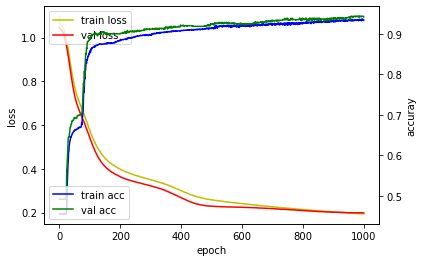

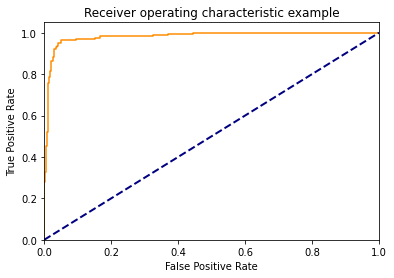


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01502146 0.01502146 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02575107 0.02575107 0.027897
 0.027897   0.03004292 0.03004292 0.03648069 0.03648069 0.03862661
 0.03862661 0.04077253 0.04077253 0.04935622 0.04935622 0.08798283
 0.09227468 0.0944206  0.0944206  0.15236052 0.15236052 0.16738197
 0.16738197 0.32403433 0.32403433 0.37124464 0.37124464 0.40772532
 0.41201717 0.44420601 0.44420601 0.47854077 0.48712446 0.5472103
 0.55150215 0.60944206 0.61373391 0.71030043 0.71459227 0.77038627
 0.77467811 0.88626609 0.89055794 0.89484979 0.90343348 0.9055794
 0.90987124 1.        ]

tpr : [0.         0.00578035 0.27745665 0.27745665 0.32947977 0.32947977
 0.43930636 0.43930636 0.45086705 0.45086705 0.52023121 0.52023121
 0.75722543 0.75722543 0.78612717 0.78612717 0.8150289  0.8150289
 0.8265896  0.8265896  0.86127

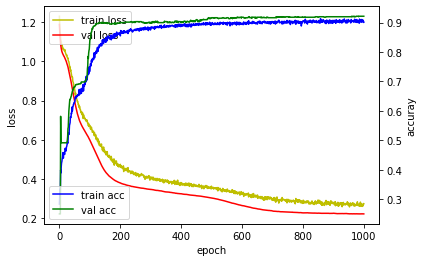

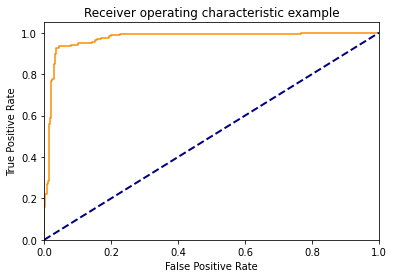


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00858369
 0.00858369 0.01072961 0.01072961 0.01287554 0.01287554 0.01502146
 0.01502146 0.01716738 0.01716738 0.0193133  0.0193133  0.02145923
 0.02145923 0.02360515 0.02360515 0.027897   0.027897   0.03004292
 0.03004292 0.03218884 0.03218884 0.03648069 0.03648069 0.04291845
 0.04291845 0.04506438 0.04506438 0.07939914 0.07939914 0.10085837
 0.10085837 0.1416309  0.1416309  0.15236052 0.15236052 0.15879828
 0.15879828 0.1695279  0.1695279  0.19313305 0.19313305 0.19957082
 0.19957082 0.22532189 0.22532189 0.46995708 0.47424893 0.49570815
 0.5        0.58798283 0.59227468 0.64806867 0.65236052 0.74034335
 0.74463519 0.75536481 0.75965665 0.76824034 0.76824034 0.96566524
 0.96995708 1.        ]

tpr : [0.         0.00578035 0.15606936 0.15606936 0.21965318 0.21965318
 0.2716763  0.2716763  0.28323699 0.28323699 0.38150289 0.38150289
 0.56069364 0.56069364 0.58959538 0.58959538 0.73410405 0.73410405
 0.76878613 0.76878613 0

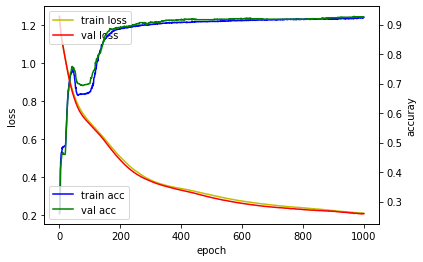

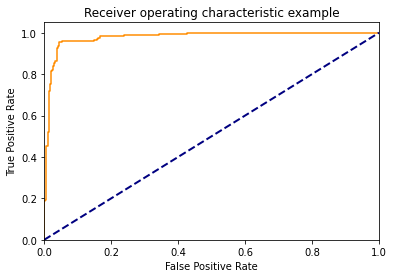


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.01072961 0.01072961 0.01287554
 0.01287554 0.01502146 0.01502146 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03004292 0.03004292 0.03218884
 0.03218884 0.03862661 0.03862661 0.04077253 0.04077253 0.04291845
 0.04291845 0.04506438 0.04935622 0.05364807 0.05364807 0.14806867
 0.14806867 0.15665236 0.15665236 0.16094421 0.16094421 0.16738197
 0.16738197 0.23819742 0.23819742 0.34334764 0.34334764 0.42703863
 0.42703863 0.45922747 0.46351931 0.472103   0.47639485 0.49570815
 0.5        0.55364807 0.55793991 0.65665236 0.66094421 0.6695279
 0.67381974 0.69957082 0.70815451 0.75107296 0.75536481 0.90987124
 0.91416309 1.        ]

tpr : [0.         0.00578035 0.1849711  0.1849711  0.19075145 0.19075145
 0.38150289 0.38150289 0.45086705 0.45086705 0.52023121 0.52023121
 0.66473988 0.66473988 0.7

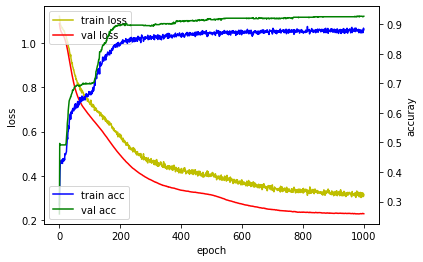

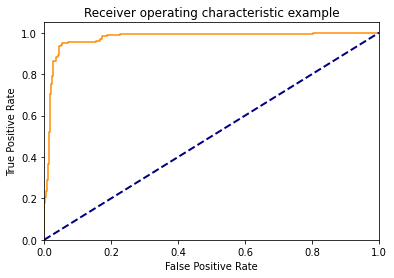


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.02575107
 0.02575107 0.03648069 0.03648069 0.04077253 0.04077253 0.04291845
 0.04291845 0.04506438 0.04506438 0.05150215 0.05150215 0.05364807
 0.05364807 0.05579399 0.06008584 0.07081545 0.07081545 0.15450644
 0.15450644 0.16523605 0.16523605 0.16738197 0.16738197 0.17167382
 0.17167382 0.17381974 0.17381974 0.1888412  0.1888412  0.22532189
 0.22532189 0.42918455 0.43347639 0.50429185 0.50858369 0.60300429
 0.60729614 0.69313305 0.69742489 0.71459227 0.71888412 0.72317597
 0.72746781 0.80257511 0.80257511 1.        ]

tpr : [0.         0.00578035 0.17919075 0.17919075 0.20809249 0.20809249
 0.21387283 0.21387283 0.23699422 0.23699422 0.28901734 0.28901734
 0.36416185 0.36416185 0.52023121 0.52023121 0.70520231 0.70520231
 0.

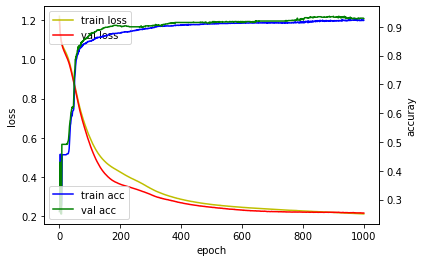

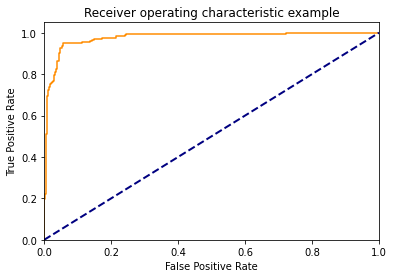


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01716738 0.01716738 0.0193133
 0.0193133  0.02360515 0.02360515 0.02575107 0.02575107 0.027897
 0.027897   0.03218884 0.03218884 0.03648069 0.03648069 0.03862661
 0.03862661 0.04291845 0.04291845 0.04506438 0.04506438 0.0472103
 0.0472103  0.05364807 0.05364807 0.05579399 0.05579399 0.11158798
 0.11158798 0.13733906 0.13733906 0.1416309  0.1416309  0.15021459
 0.15021459 0.17167382 0.17167382 0.21459227 0.21459227 0.24248927
 0.24248927 0.24463519 0.24463519 0.43776824 0.44206009 0.4527897
 0.46137339 0.50429185 0.50858369 0.56437768 0.56866953 0.58798283
 0.59227468 0.63090129 0.63519313 0.72317597 0.72317597 0.92274678
 0.92703863 0.92918455 0.93347639 0.94206009 0.94635193 0.9527897
 0.95708155 0.95922747 0.96351931 0.97854077 0.98283262 1.        ]

tpr : [0.         0.00578035 0.19653179 0.19653179 0.219653

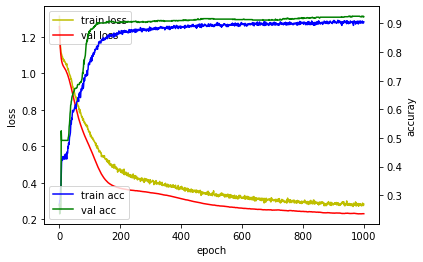

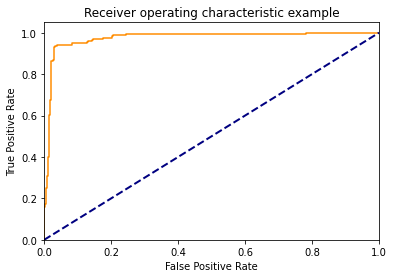


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.02575107
 0.02575107 0.027897   0.027897   0.03004292 0.03004292 0.03218884
 0.03218884 0.03862661 0.03862661 0.08369099 0.08369099 0.12017167
 0.12446352 0.12875536 0.12875536 0.13090129 0.13090129 0.14377682
 0.14377682 0.14592275 0.14592275 0.17596567 0.17596567 0.20171674
 0.20171674 0.20600858 0.20600858 0.24463519 0.24463519 0.42060086
 0.4248927  0.50429185 0.50858369 0.56866953 0.57296137 0.57939914
 0.58369099 0.64592275 0.65021459 0.71244635 0.7167382  0.78111588
 0.78111588 1.        ]

tpr : [0.         0.00578035 0.15606936 0.15606936 0.1734104  0.1734104
 0.21965318 0.21965318 0.24855491 0.24855491 0.30635838 0.30635838
 0.39884393 0.39884393 0.57803468 0.57803468 0.60115607 0.60115607
 0.67630058 0.67630058 0.

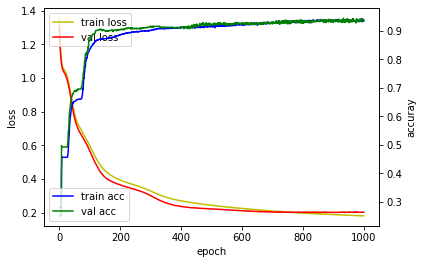

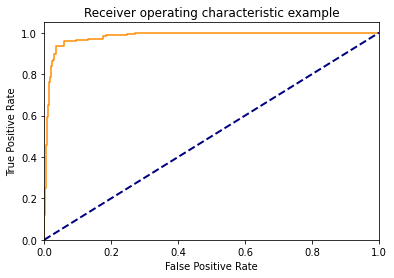


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03004292 0.03004292 0.03433476
 0.03433476 0.03648069 0.03648069 0.05793991 0.05793991 0.0944206
 0.0944206  0.11802575 0.1223176  0.13090129 0.13090129 0.17596567
 0.17596567 0.18454936 0.18454936 0.24678112 0.24678112 0.27038627
 0.27038627 0.42060086 0.4248927  0.43776824 0.44206009 0.69742489
 0.70171674 0.71030043 0.71459227 0.77038627 0.77467811 0.81330472
 0.81759657 0.99570815 1.        ]

tpr : [0.         0.00578035 0.12138728 0.12138728 0.24855491 0.24855491
 0.40462428 0.40462428 0.4566474  0.4566474  0.59537572 0.59537572
 0.65317919 0.65317919 0.75722543 0.75722543 0.76300578 0.76300578
 0.78612717 0.78612717 0.83815029 0.83815029 0.86127168 0.86127168
 0.86705202 0.

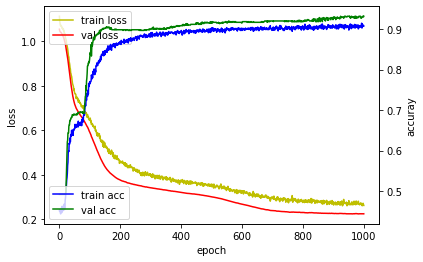

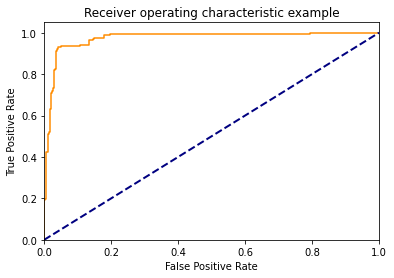


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.01072961 0.01072961 0.01287554
 0.01287554 0.01502146 0.01502146 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.02575107
 0.02575107 0.027897   0.027897   0.03004292 0.03004292 0.03218884
 0.03218884 0.03433476 0.03433476 0.03862661 0.03862661 0.04077253
 0.04077253 0.04935622 0.04935622 0.10729614 0.10729614 0.13519313
 0.13519313 0.14592275 0.14592275 0.14806867 0.14806867 0.17811159
 0.17811159 0.19527897 0.19527897 0.38626609 0.39055794 0.46351931
 0.46781116 0.65236052 0.65665236 0.66309013 0.6695279  0.74892704
 0.75321888 0.75965665 0.7639485  0.79399142 0.79399142 0.89484979
 0.89914163 1.        ]

tpr : [0.         0.00578035 0.19075145 0.19075145 0.19653179 0.19653179
 0.34682081 0.34682081 0.42196532 0.42196532 0.50867052 0.50867052
 0.51445087 0.51445087 0.52023121 0.52023121 0.6300578  0.6300578
 0.64739884 0.64739884 0.7

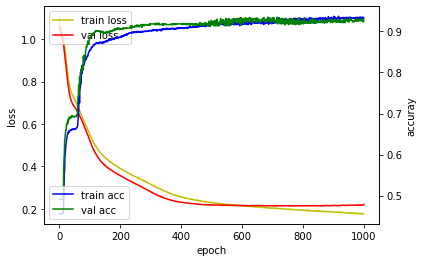

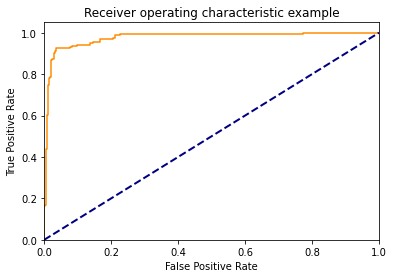


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01502146 0.01502146 0.01716738 0.01716738 0.0193133
 0.0193133  0.02145923 0.02145923 0.02360515 0.02360515 0.027897
 0.027897   0.03004292 0.03004292 0.03218884 0.03218884 0.03433476
 0.03433476 0.03648069 0.03648069 0.07725322 0.07725322 0.08369099
 0.08369099 0.09871245 0.09871245 0.13733906 0.13733906 0.14592275
 0.14592275 0.16523605 0.16523605 0.16738197 0.16738197 0.20600858
 0.20600858 0.21244635 0.21244635 0.22532189 0.22532189 0.37553648
 0.37982833 0.53218884 0.53648069 0.56866953 0.57296137 0.5751073
 0.57939914 0.61587983 0.62017167 0.70600858 0.71030043 0.77253219
 0.77253219 0.85622318 0.86051502 1.        ]

tpr : [0.         0.00578035 0.16184971 0.16184971 0.16763006 0.16763006
 0.24855491 0.24855491 0.43930636 0.43930636 0.60115607 0.60115607
 0.74566474 0.74566474 0.78034682 0.78034682 0.78612717 0.78612717
 0.838

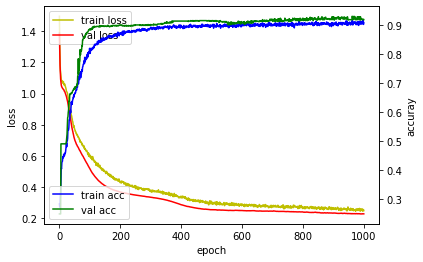

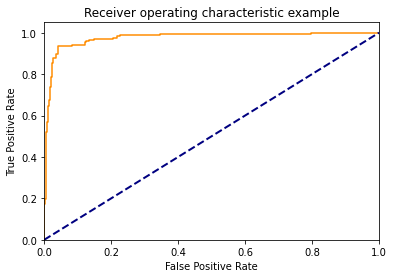


fpr : [0.         0.         0.         0.00214592 0.00214592 0.00429185
 0.00429185 0.00643777 0.00643777 0.00858369 0.00858369 0.01072961
 0.01072961 0.01287554 0.01287554 0.01502146 0.01502146 0.01716738
 0.01716738 0.0193133  0.0193133  0.02145923 0.02145923 0.02360515
 0.02360515 0.02575107 0.02575107 0.03433476 0.03433476 0.04077253
 0.04077253 0.08369099 0.08369099 0.1223176  0.1223176  0.12446352
 0.12446352 0.13519313 0.13519313 0.1416309  0.14592275 0.14806867
 0.14806867 0.20600858 0.20600858 0.21888412 0.21888412 0.22532189
 0.22532189 0.34549356 0.34549356 0.47854077 0.48283262 0.51502146
 0.5193133  0.59012876 0.5944206  0.70815451 0.71244635 0.7167382
 0.72103004 0.73819742 0.74248927 0.79828326 0.79828326 0.94849785
 0.9527897  1.        ]

tpr : [0.         0.00578035 0.1734104  0.1734104  0.19653179 0.19653179
 0.51445087 0.51445087 0.52023121 0.52023121 0.56647399 0.56647399
 0.64739884 0.64739884 0.67052023 0.67052023 0.67630058 0.67630058
 0.73988439 0.73988439 0.

In [41]:
import numpy as np

num_epochs = 1000


actiFunc = ['relu', 'sigmoid']
lossFunc = ['categorical_crossentropy']
hidden = [3]
node = [
    [16, 8, 4], [16, 8, 8], [16, 8, 16], [16, 16, 4], [16, 16, 8], [16, 16, 16],
    [32, 8, 4], [32, 8, 8], [32, 8, 16], [32, 16, 4], [32, 16, 8], [32, 16, 16],
    [32, 32, 4], [32, 32, 8], [32, 32, 16], [32, 32, 32]
]
batchSize = [512]
dropout = [0, 0.1]

all_acc_histories = []
all_loss_histories = []

for i in range(len(actiFunc)):
    for j in range(len(lossFunc)):
        for k in range(len(hidden)):
            for l in range(len(node)):
                for m in range(len(batchSize)):
                    for n in range(len(dropout)):
                        print('Activation:', actiFunc[i] , '  Loss:', lossFunc[j] , '  HiddenLayer:', hidden[k] , '  Node:[', node[l][0], ',', node[l][1] , ',', node[l][2], ']  BatchSize:', batchSize[m], '  Dropout:', dropout[n])
    
                        model = build_model(actiFunc[i], lossFunc[j], hidden[k], node[l], dropout[n])
                        model.summary()
                        history = model.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=num_epochs, batch_size=batchSize[m], verbose=False)
    
                        acc_history = history.history['val_acc']
                        all_acc_histories.append(acc_history)
                        loss_history = history.history['val_loss']
                        all_loss_histories.append(loss_history)
    
                        print('loss min :', min(loss_history), '  acc max:', max(acc_history))
                        print('loss mean :', np.mean(loss_history), '  acc mean:', np.mean(acc_history))
            
                        fig, loss_ax = plt.subplots()
                        acc_ax = loss_ax.twinx()

                        loss_ax.plot(history.history['loss'], 'y', label='train loss')
                        loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

                        acc_ax.plot(history.history['acc'], 'b', label='train acc')
                        acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

                        loss_ax.set_xlabel('epoch')
                        loss_ax.set_ylabel('loss')
                        acc_ax.set_ylabel('accuray')

                        loss_ax.legend(loc='upper left')
                        acc_ax.legend(loc='lower left')

                        plt.show()
                        
                        
                        y_val_cat_prob = model.predict_proba(test_data)
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(y_val_cat_prob)):
                            if(np.argmax(y_val_cat_prob[x]) == 2):
                                temp_test_data.append(max(y_val_cat_prob[x]))
                            else:
                                temp_test_data.append(1 - (max(y_val_cat_prob[x])))
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                                
                                
                        fpr, tpr, thresholds = roc_curve(temp_test_label, temp_test_data)
                        
                        
                        plt.figure()
                        lw = 2
                        plt.plot(fpr, tpr, color='darkorange')
                        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

                        plt.xlim([0.0, 1.0])
                        plt.ylim([0.0, 1.05])

                        plt.xlabel('False Positive Rate')
                        plt.ylabel('True Positive Rate')
                        plt.title('Receiver operating characteristic example')
                        plt.show()
                        
                        print()
                        print('fpr :', fpr)
                        print()
                        print('tpr :', tpr)
                        print()
                        
                        test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=1)
                        print()
                        print('test_acc : ', test_acc)
                        print()
                        
                        pred_data = model.predict(test_data)
                        
                        #print()
                        #print('pred_data : ', pred_data)
                        #print()
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(pred_data)):
                            if(np.argmax(pred_data[x]) == 2):
                                temp_test_data.append(1)
                            else:
                                temp_test_data.append(0)
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                        
                        PP = 0
                        PF = 0
                        FP = 0
                        FF = 0
                        
                        for x in range(0, len(temp_test_data)):
                            if(temp_test_data[x] == 0 and temp_test_label[x] == 0):
                                PP = PP + 1
                            elif(temp_test_data[x] == 0 and temp_test_label[x] == 1):
                                PF = PF + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 0):
                                FP = FP + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 1):
                                FF = FF + 1
                        
                        print()
                        print('눈 깜빡임을 눈 깜빡임으로 분류 : ', PP)
                        print('눈 깜빡임을 잡파로 분류 : ', PF)
                        print('잡파를 눈 깜빡임으로 분류 : ', FP)
                        print('잡파를 잡파로 분류 : ', FF)
                        print()
                        
                        print()
                        print()
                        print('=======================================================================================================')
                        print()
                        print()